# Environment

In [2]:
import fitbit

import pandas as pd
import numpy as np
from datetime import datetime
from fbprophet import Prophet

import matplotlib.pyplot as plt
%matplotlib inline
from pandas import Series
from fbprophet import Prophet

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric, plot_forecast_component

import math

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

from pylab import rcParams

# Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Acquisition

In [3]:
chunks = fitbit.get_fitbit(files=['2018-04-26_through_2018-05-26.csv',
                           '2018-05-27_through_2018-06-26.csv',
                           '2018-06-27_through_2018-07-27.csv',
                           '2018-07-28_through_2018-08-26.csv',
                           '2018-08-27_through_2018-09-26.csv',
                           '2018-09-27_through_2018-10-27.csv',
                           '2018-10-28_through_2018-11-27.csv',
                           '2018-11-28_through_2018-12-28.csv'])

chunks = fitbit.clean_fitbit(chunks, cols=['Date', 'Calories Burned', 'Steps',
                            'Distance', 'Floors', 'Minutes Sedentary',
                            'Minutes Lightly Active', 'Minutes Fairly Active',
                            'Minutes Very Active', 'Activity Calories'])

# Preparation

In [4]:
df = fitbit.prepare_fitbit(chunks, 8, 'Date')
df

Calories Burned   Steps  Distance  Floors Minutes Sedentary  \
Date                                                                     
2018-04-26           2,635   2,931      1.38     2.0             1,347   
2018-04-27           3,649   9,971      4.70    19.0             1,158   
2018-04-28           3,379   3,521      1.66     2.0               702   
2018-04-29           2,851   1,639      0.77     0.0               891   
2018-04-30           2,825   1,323      0.62     0.0               880   
2018-05-01           3,292   2,581      1.22     0.0               919   
2018-05-02           2,660   1,372      0.65     0.0               927   
2018-05-03           3,121   2,232      1.05     0.0               876   
2018-05-04           2,522     904      0.43     1.0             1,012   
2018-05-05           2,551     833      0.39     0.0               969   
2018-05-06           2,771   1,383      0.65     0.0               976   
2018-05-07           2,524     952      0.45     0.0               907   
2018-05-08           2,591   1,187      0.56     2.0             1,221   
2018-05-09           2,153      21      0.01     0.0             1,438   
2018-05-10           3,081   1,364      0.64     0.0             1,295   
2018-05-11           2,950   2,771      1.31     1.0               947   
2018-05-12           3,318   4,125      1.95     2.0               756   
2018-05-13           2,572   1,689      0.80     0.0               895   
2018-05-14           2,966   3,710      1.75     0.0               959   
2018-05-15           3,152   4,313      2.03     0.0               767   
2018-05-16           3,497   5,882      2.77     1.0               825   
2018-05-17           3,066   4,080      1.92     4.0               867   
2018-05-18           4,376  13,958      6.58     7.0               682   
2018-05-19           4,112  14,917      7.04     7.0               646   
2018-05-20           3,098   4,986      2.35     3.0               795   
2018-05-21           3,009   3,989      1.88     3.0               727   
2018-05-22           3,581   4,680      2.21     1.0               625   
2018-05-23           3,772   6,889      3.25     0.0               921   
2018-05-24           2,756   3,470      1.64     0.0               804   
2018-05-25           3,155   5,389      2.54     1.0               821   
...                    ...     ...       ...     ...               ...   
2018-11-07           3,681  13,664      6.46     9.0               566   
2018-11-08           4,137  15,542      7.33    26.0               716   
2018-11-09           4,445  16,732      7.99    14.0               698   
2018-11-10           3,863  13,636      7.04    16.0               589   
2018-11-11           4,264  17,761      8.36   129.0               486   
2018-11-12           3,444  10,184      4.82    19.0               651   
2018-11-13           3,202  10,330      4.87    16.0               615   
2018-11-14           3,081   7,598      3.58    15.0               835   
2018-11-15           3,815  12,360      5.90    10.0               644   
2018-11-16           3,780  12,286      5.73    13.0               576   
2018-11-17           4,548  20,395     10.06    31.0               464   
2018-11-18           4,832  25,512     12.00    23.0               450   
2018-11-19           3,697  11,993      5.56    17.0               502   
2018-11-20           3,966  15,527      7.27    13.0               810   
2018-11-21           3,738  11,079      5.16     4.0               582   
2018-11-22           4,494  16,705      7.84   177.0               522   
2018-11-23           3,325   9,602      4.53    16.0               660   
2018-11-24           4,098  17,004      9.20    23.0               532   
2018-11-25           3,005   6,921      3.26    11.0               614   
2018-11-26           3,364  10,563      5.64    20.0               587   
2018-11-27           3,726  13,420      6.29     7.0               650   
2018-11-28     

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 224 entries, 2018-04-26 to 2018-12-06
Data columns (total 9 columns):
Calories Burned           224 non-null object
Steps                     224 non-null object
Distance                  224 non-null float64
Floors                    224 non-null float64
Minutes Sedentary         224 non-null object
Minutes Lightly Active    224 non-null float64
Minutes Fairly Active     224 non-null float64
Minutes Very Active       224 non-null float64
Activity Calories         224 non-null object
dtypes: float64(5), object(4)
memory usage: 17.5+ KB


In [6]:
fitbit.missing_values_col(df)

num_missing  missing_percentage  num_empty  \
Calories Burned                   0                 0.0          0   
Steps                             0                 0.0          0   
Distance                          0                 0.0          0   
Floors                            0                 0.0          0   
Minutes Sedentary                 0                 0.0          0   
Minutes Lightly Active            0                 0.0          0   
Minutes Fairly Active             0                 0.0          0   
Minutes Very Active               0                 0.0          0   
Activity Calories                 0                 0.0          0   

                        empty_percentage  nan_count  nan_percentage  
Calories Burned                      0.0          0             0.0  
Steps                                0.0          0             0.0  
Distance                             0.0          0             0.0  
Floors                               0.0          0             0.0  
Minutes Sedentary                    0.0          0             0.0  
Minutes Lightly Active               0.0          0             0.0  
Minutes Fairly Active                0.0          0             0.0  
Minutes Very Active                  0.0          0             0.0  
Activity Calories                    0.0          0             0.0

In [7]:
df = fitbit.convert_to_float(df, 'Calories Burned', 'Steps', 'Minutes Sedentary', 'Activity Calories')

In [8]:
fitbit.missing_values_col(df)

num_missing  missing_percentage  num_empty  \
Calories Burned                   0            0.000000          0   
Steps                             0            0.000000          0   
Distance                          0            0.000000          0   
Floors                            0            0.000000          0   
Minutes Sedentary                71           31.696429          0   
Minutes Lightly Active            0            0.000000          0   
Minutes Fairly Active             0            0.000000          0   
Minutes Very Active               0            0.000000          0   
Activity Calories                 0            0.000000          0   

                        empty_percentage  nan_count  nan_percentage  
Calories Burned                      0.0          0             0.0  
Steps                                0.0          0             0.0  
Distance                             0.0          0             0.0  
Floors                               0.0          0             0.0  
Minutes Sedentary                    0.0          0             0.0  
Minutes Lightly Active               0.0          0             0.0  
Minutes Fairly Active                0.0          0             0.0  
Minutes Very Active                  0.0          0             0.0  
Activity Calories                    0.0          0             0.0

In [9]:
# Impute NaNs with mean values
df = df.fillna(df.mean())
fitbit.missing_values_col(df)

num_missing  missing_percentage  num_empty  \
Calories Burned                   0                 0.0          0   
Steps                             0                 0.0          0   
Distance                          0                 0.0          0   
Floors                            0                 0.0          0   
Minutes Sedentary                 0                 0.0          0   
Minutes Lightly Active            0                 0.0          0   
Minutes Fairly Active             0                 0.0          0   
Minutes Very Active               0                 0.0          0   
Activity Calories                 0                 0.0          0   

                        empty_percentage  nan_count  nan_percentage  
Calories Burned                      0.0          0             0.0  
Steps                                0.0          0             0.0  
Distance                             0.0          0             0.0  
Floors                               0.0          0             0.0  
Minutes Sedentary                    0.0          0             0.0  
Minutes Lightly Active               0.0          0             0.0  
Minutes Fairly Active                0.0          0             0.0  
Minutes Very Active                  0.0          0             0.0  
Activity Calories                    0.0          0             0.0

# Exploration

In [10]:
fitbit.summarize_data(df)

HEAD
            Calories Burned   Steps  Distance  Floors  Minutes Sedentary  \
Date                                                                       
2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

            Minutes Lightly Active  Minutes Fairly Active  \
Date                                                        
2018-04-26                    93.0                    0.0   
2018-04-27                   219.0                   46.0   
2018-04-28                   155.0                   22.0   
2018-04-29                   122.0                    0.0   
2018-04-30                   104.0                    0.0   

            Minutes Very Active  A

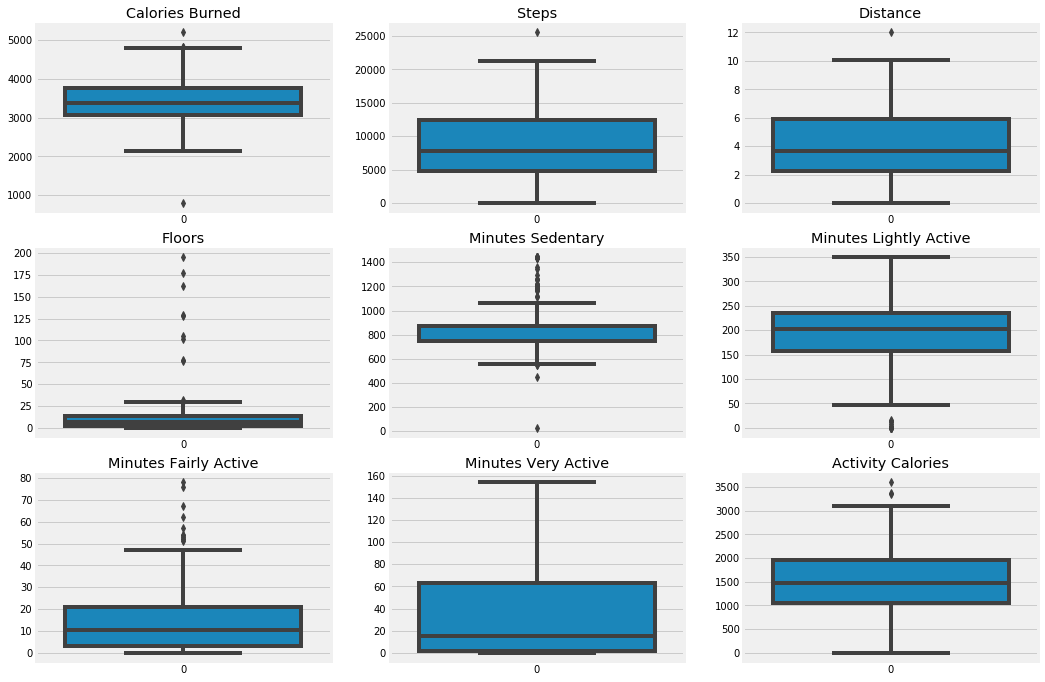

In [11]:
fitbit.plot_subs(df,
             df.select_dtypes(include='number').columns.values)

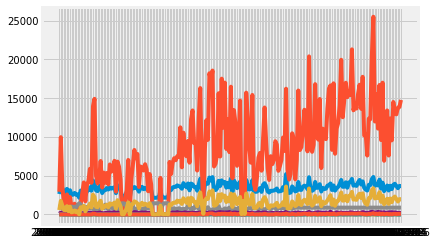

In [12]:
plt.plot(df)
plt.show()

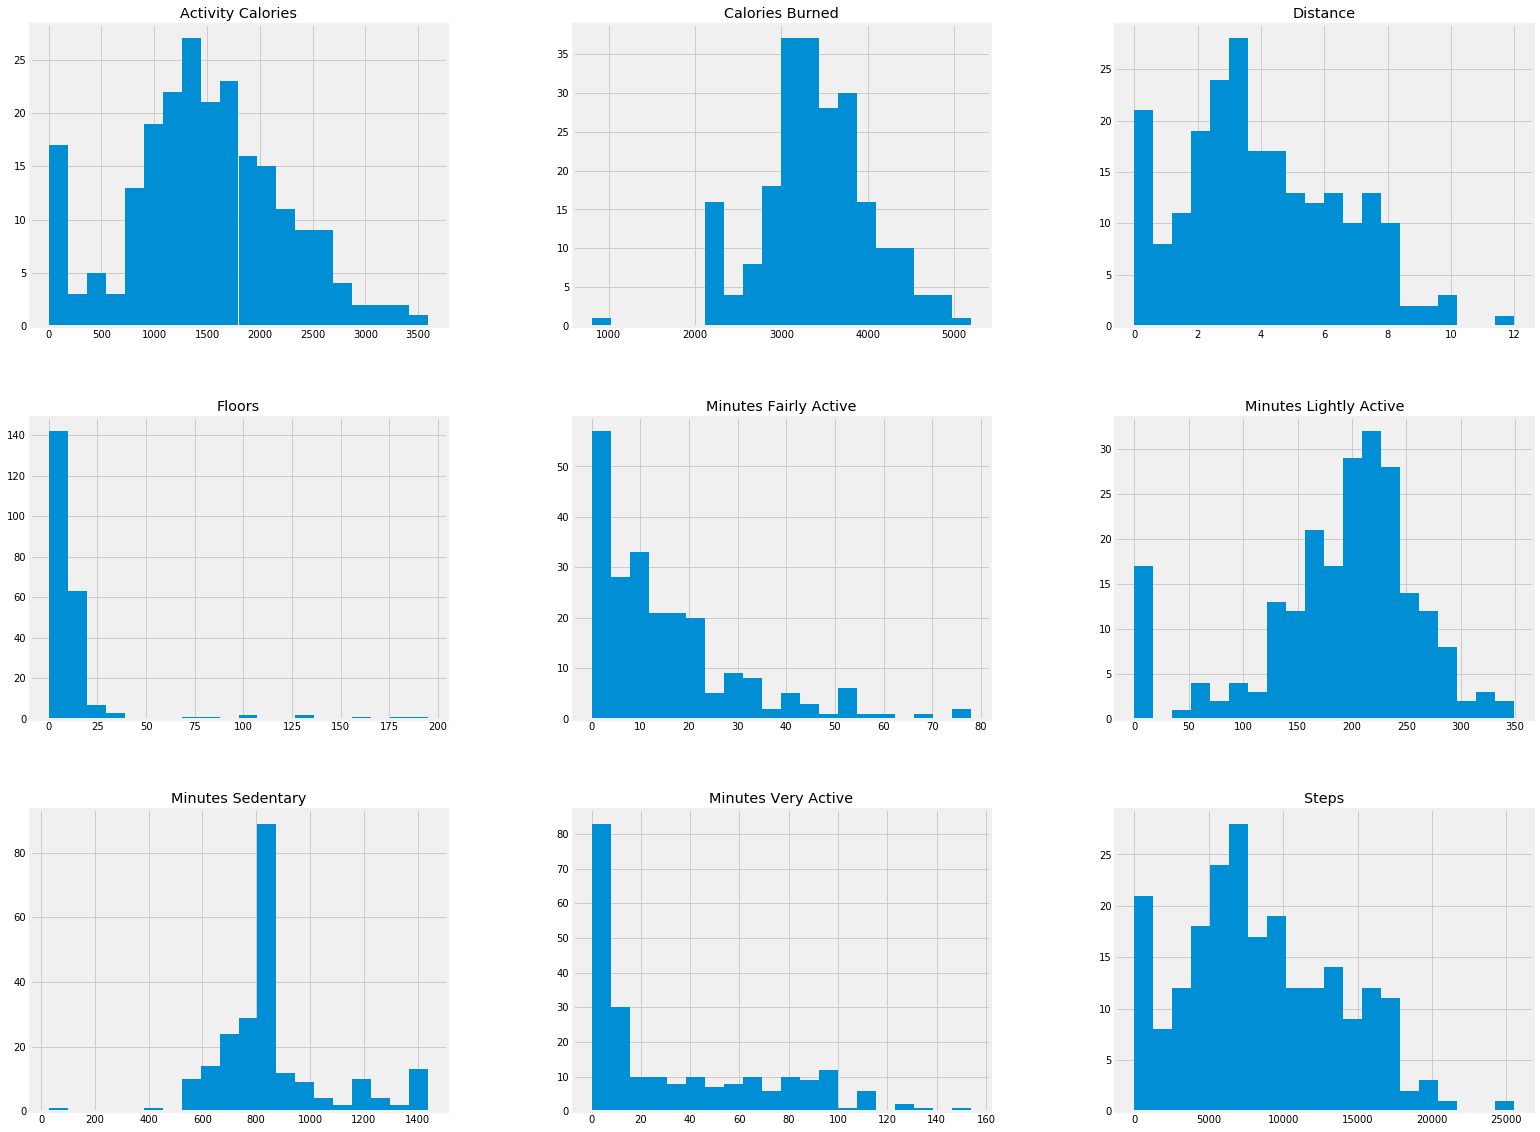

In [13]:
fitbit.plot_hist(df,20)

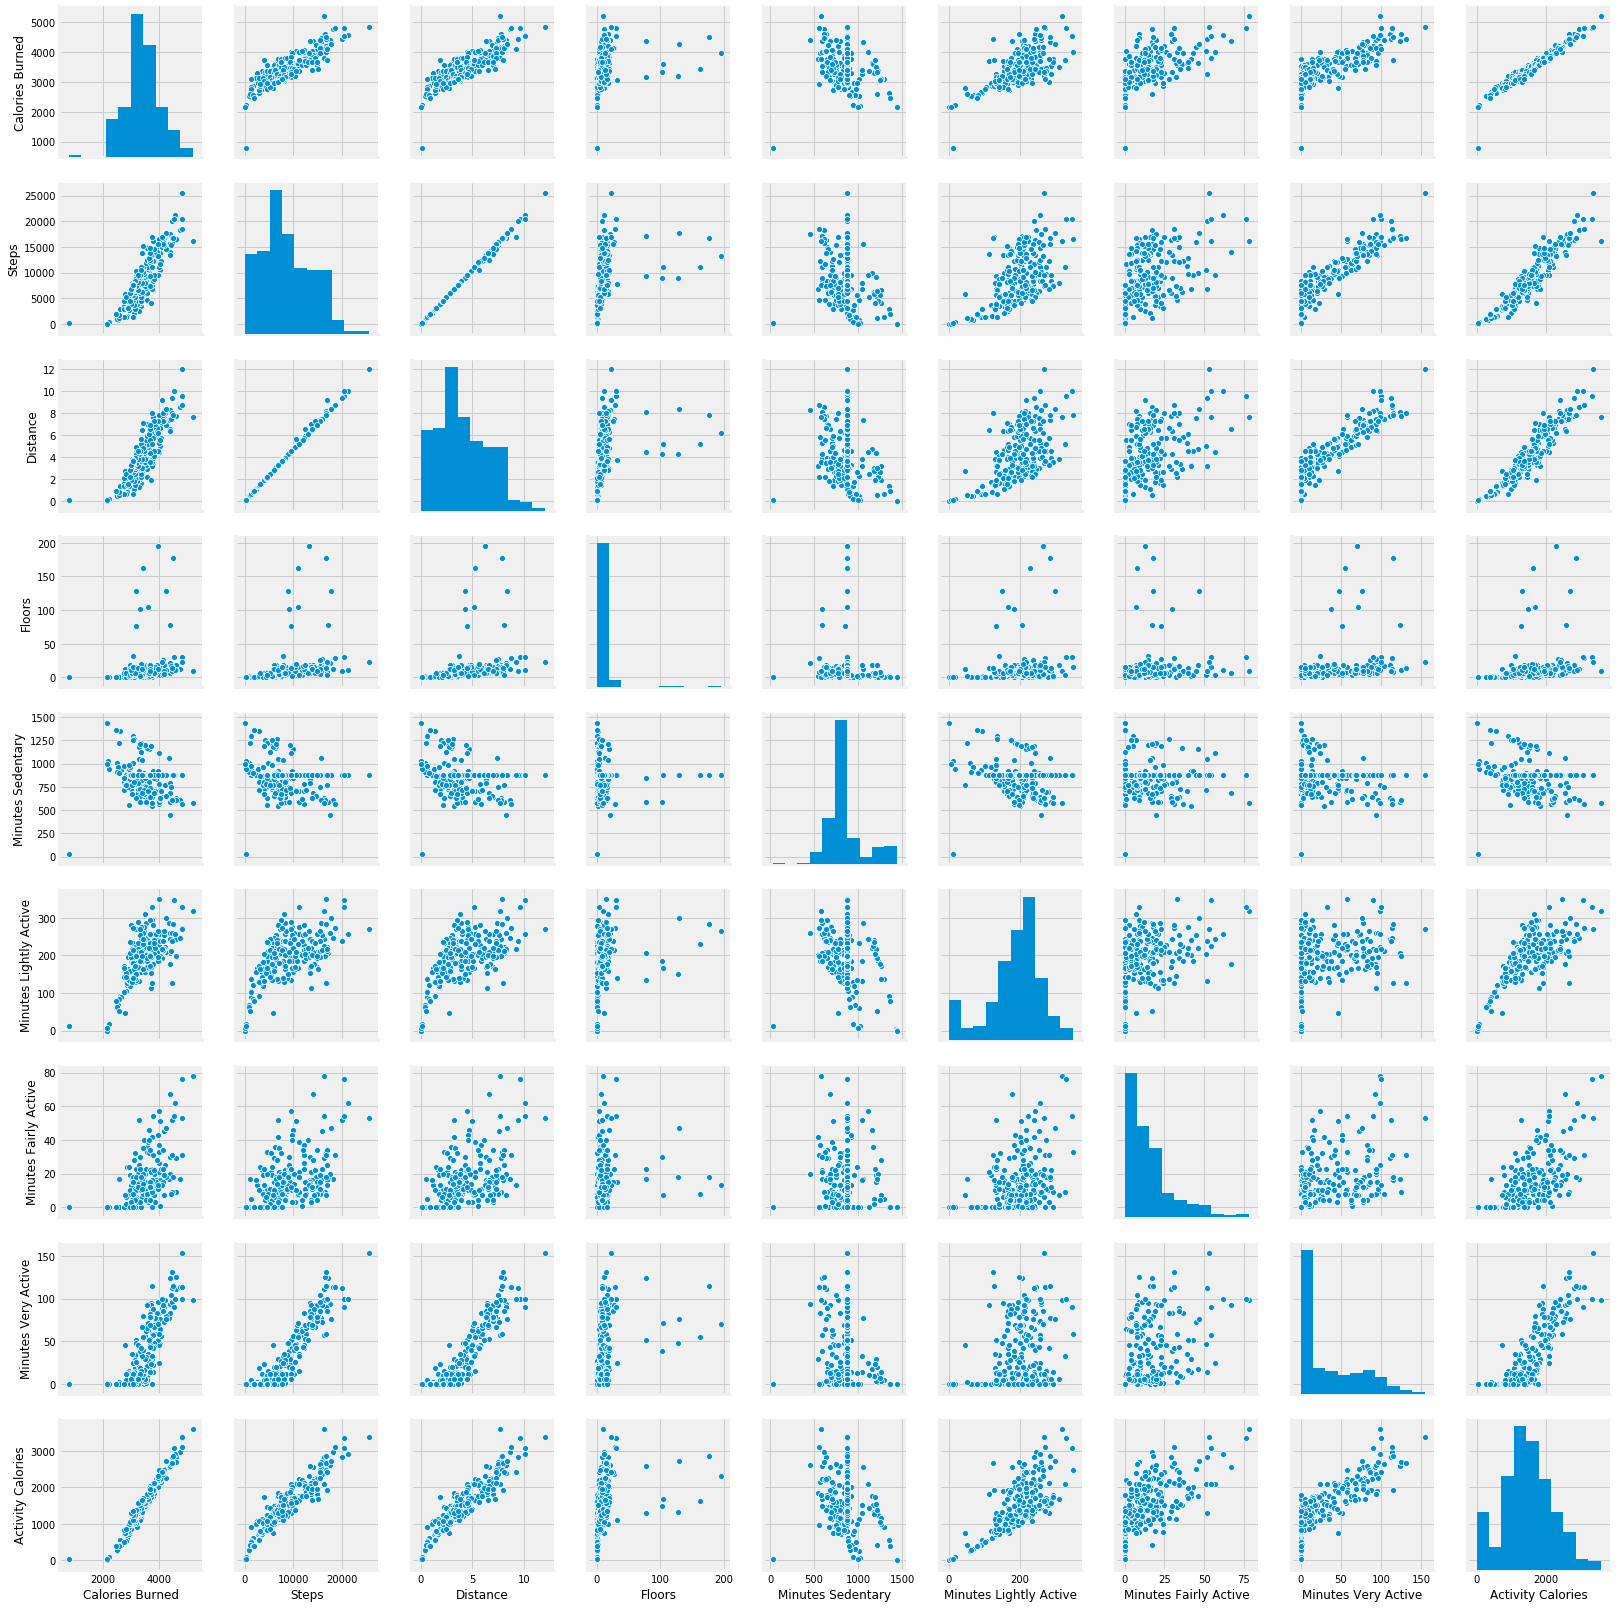

In [14]:
sns.pairplot(df)

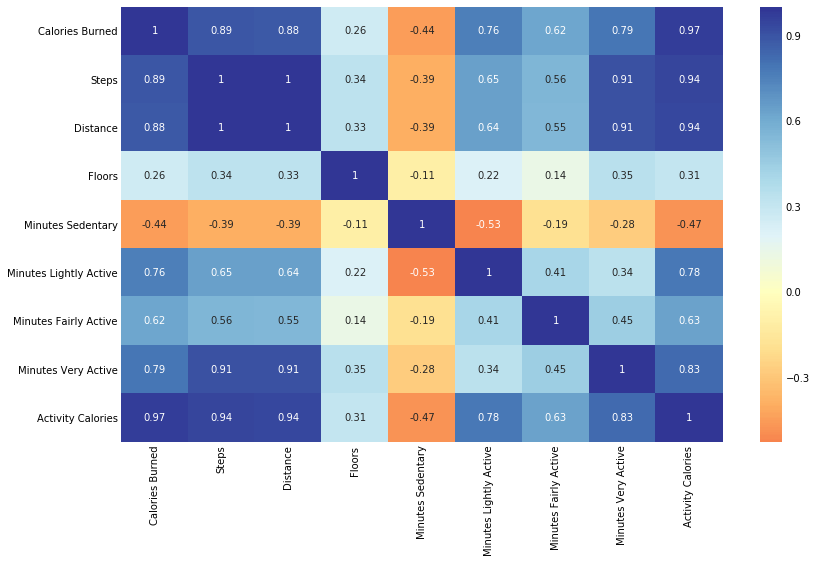

In [15]:
fitbit.plot_heat(df)

In [16]:
df.head()

Calories Burned   Steps  Distance  Floors  Minutes Sedentary  \
Date                                                                       
2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

            Minutes Lightly Active  Minutes Fairly Active  \
Date                                                        
2018-04-26                    93.0                    0.0   
2018-04-27                   219.0                   46.0   
2018-04-28                   155.0                   22.0   
2018-04-29                   122.0                    0.0   
2018-04-30                   104.0                    0.0   

            Minutes Very Active  Activity Calories  
Date                                                
2018-04-26                  0.0              566.0  
2018-04-27                 17.0             1752.0  
2018-04-28                 11.0             1124.0  
2018-04-29                  0.0              602.0  
2018-04-30                  0.0              540.0

In [17]:
df = df.reset_index()

In [18]:
df = fitbit.input_missing_row(df)

In [19]:
df = df.rename(columns={'Calories Burned': 'calories_burned'})

In [20]:
df.head()

Date  calories_burned   Steps  Distance  Floors  Minutes Sedentary  \
0 2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
1 2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2 2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
3 2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
4 2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                    93.0                    0.0                  0.0   
1                   219.0                   46.0                 17.0   
2                   155.0                   22.0                 11.0   
3                   122.0                    0.0                  0.0   
4                   104.0                    0.0                  0.0   

   Activity Calories  
0              566.0  
1             1752.0  
2             1124.0  
3              602.0  
4              540.0

In [21]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [22]:
df.head()

calories_burned   Steps  Distance  Floors  Minutes Sedentary  \
Date                                                                       
2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

            Minutes Lightly Active  Minutes Fairly Active  \
Date                                                        
2018-04-26                    93.0                    0.0   
2018-04-27                   219.0                   46.0   
2018-04-28                   155.0                   22.0   
2018-04-29                   122.0                    0.0   
2018-04-30                   104.0                    0.0   

            Minutes Very Active  Activity Calories  
Date                                                
2018-04-26                  0.0              566.0  
2018-04-27                 17.0             1752.0  
2018-04-28                 11.0             1124.0  
2018-04-29                  0.0              602.0  
2018-04-30                  0.0              540.0

## Train / Test Split

In [23]:
# train = df[:'2018-10-31']
# test = df['2018-11-01':]
# print(train.nunique())
# print(test.nunique())

ts_data = df['calories_burned'].resample('D').agg('sum')

train_size = int(len(ts_data) * 0.66)
train, test = ts_data[0:train_size], ts_data[train_size:len(ts_data)]
print('Observations: %d' % (len(ts_data)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 225
Training Observations: 148
Testing Observations: 77


In [24]:
train.head()

Date
2018-04-26    2635.0
2018-04-27    3649.0
2018-04-28    3379.0
2018-04-29    2851.0
2018-04-30    2825.0
Freq: D, Name: calories_burned, dtype: float64

In [25]:
cal_burned = df.resample('D').mean()

In [26]:
train.shape

(148,)

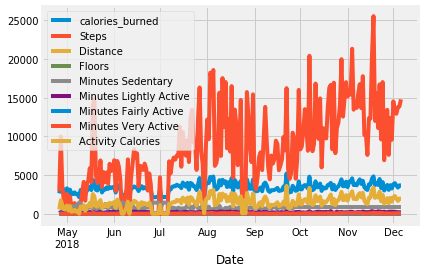

In [27]:
cal_burned.plot()

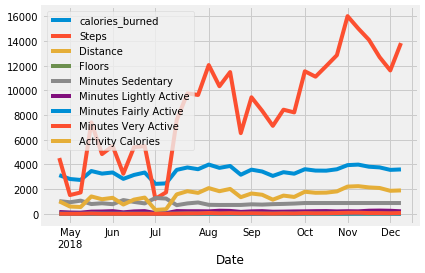

In [28]:
cal_burned.resample('W').mean().plot()

In [29]:
train.shape

(148,)

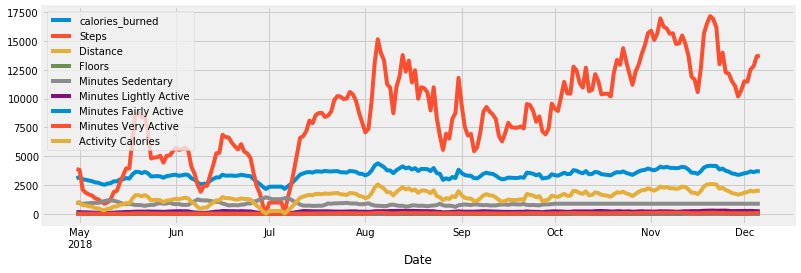

In [30]:
cal_burned.rolling(5).mean().plot(figsize=(12, 4))

In [31]:
# Fill in the gap with the mean of the column
cal_burned = cal_burned.fillna(cal_burned.mean())

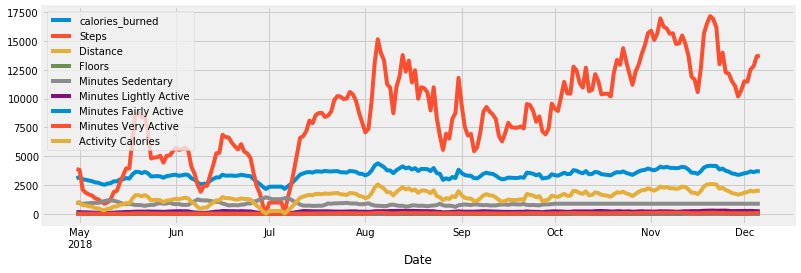

In [32]:
cal_burned.rolling(5).mean().plot(figsize=(12, 4))

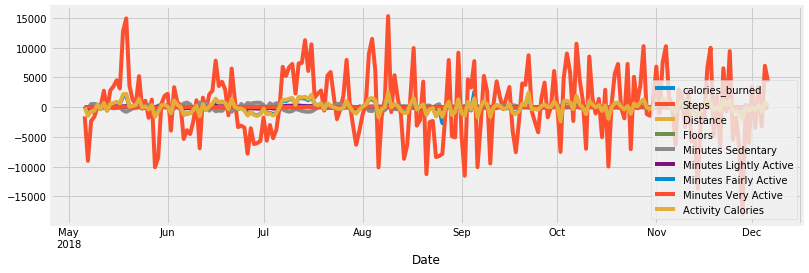

In [33]:
cal_burned.diff(periods=10).plot(figsize=(12, 4))

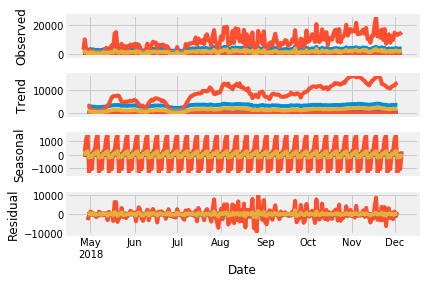

In [34]:
decomposition = sm.tsa.seasonal_decompose(cal_burned, model='additive')
fig = decomposition.plot()
plt.show()

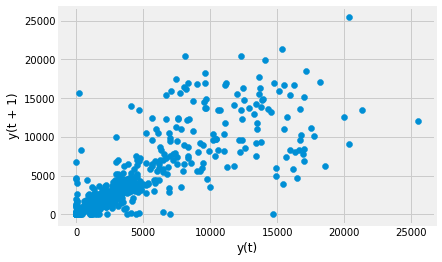

In [35]:
pd.plotting.lag_plot(cal_burned)

In [36]:
# df_corr = pd.concat([cal_burned.shift(1), cal_burned], axis=1)
# df_corr.columns = ['t-1','t+1']
# result = df_corr.corr()
# print(result)

# Modeling

In [37]:
train.shape

(148,)

In [38]:
df.rename(columns={'calories_burned': 'Calories Burned'}, inplace=True)

In [39]:
df = df.reset_index()
fitbit.convert_to_datetime(df, 'Date')
df.head()

Date  Calories Burned   Steps  Distance  Floors  Minutes Sedentary  \
0 2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
1 2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2 2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
3 2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
4 2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                    93.0                    0.0                  0.0   
1                   219.0                   46.0                 17.0   
2                   155.0                   22.0                 11.0   
3                   122.0                    0.0                  0.0   
4                   104.0                    0.0                  0.0   

   Activity Calories  
0              566.0  
1             1752.0  
2             1124.0  
3              602.0  
4              540.0

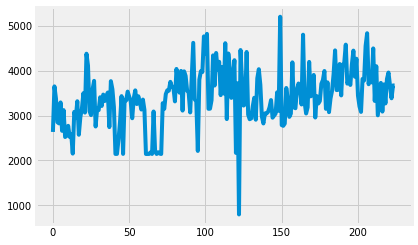

In [40]:
df['Calories Burned'].plot()

## 1. Prophet

In [40]:
ddf = df.copy()

In [41]:
ddf['y'] = df['Calories Burned']
ddf['ds'] = pd.to_datetime(ddf['Date'])
ddf = ddf.groupby(['ds'])['y'].sum().reset_index()
ddf.head()

ds       y
0 2018-04-26  2635.0
1 2018-04-27  3649.0
2 2018-04-28  3379.0
3 2018-04-29  2851.0
4 2018-04-30  2825.0

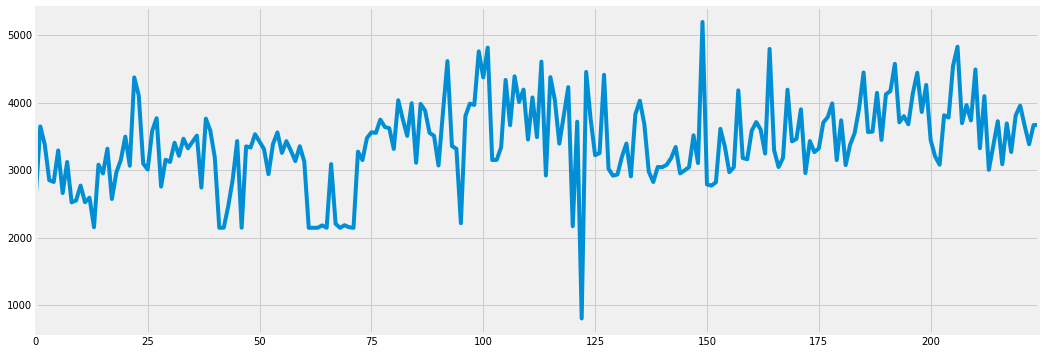

In [42]:
plt.figure(figsize=(16,6))
sns.tsplot(ddf.y)

In [43]:
ddf['cap'] = 6666
ddf['floor'] = 1000

m = Prophet(daily_seasonality=True, growth='logistic', changepoint_range=0.9)
m.fit(ddf)

future = m.make_future_dataframe(periods=60)
future['cap'] = 6666
future['floor'] = 1000
print(future.head())
print(future.tail())
print(ddf.tail())

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


          ds   cap  floor
0 2018-04-26  6666   1000
1 2018-04-27  6666   1000
2 2018-04-28  6666   1000
3 2018-04-29  6666   1000
4 2018-04-30  6666   1000
            ds   cap  floor
280 2019-01-31  6666   1000
281 2019-02-01  6666   1000
282 2019-02-02  6666   1000
283 2019-02-03  6666   1000
284 2019-02-04  6666   1000
            ds       y   cap  floor
220 2018-12-02  3957.0  6666   1000
221 2018-12-03  3660.0  6666   1000
222 2018-12-04  3384.0  6666   1000
223 2018-12-05  3670.0  6666   1000
224 2018-12-06  3669.0  6666   1000


In [44]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
280 2019-01-31  4091.393855  3357.349251  4841.803584
281 2019-02-01  4139.464815  3400.683578  4930.738799
282 2019-02-02  4224.647297  3505.165239  4923.683953
283 2019-02-03  4224.011219  3460.423767  4921.782203
284 2019-02-04  3931.238805  3231.425598  4610.783214

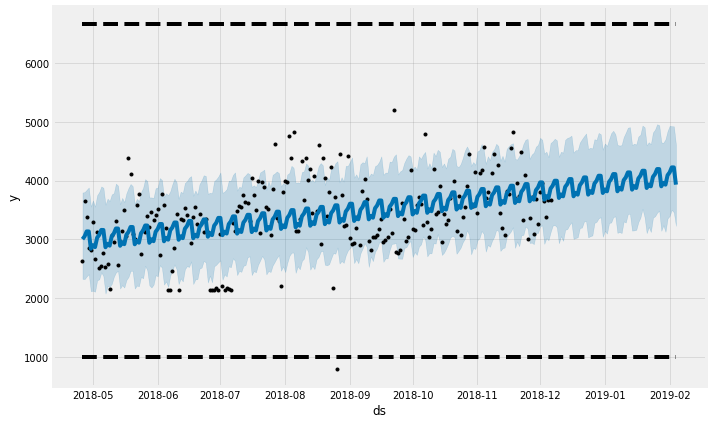

In [45]:
fig1 = m.plot(forecast)

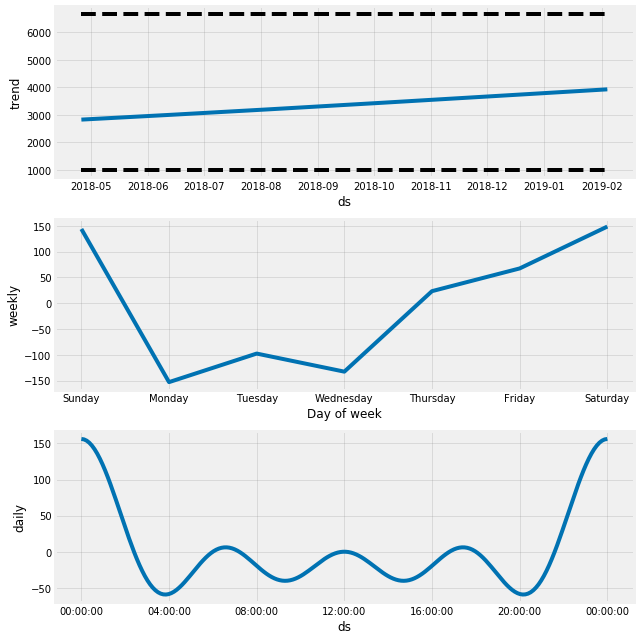

In [46]:
fig2 = m.plot_components(forecast)

In [47]:
# cross_validation(m, initial = 730, period = 180, horizon = 365, units = 'days')
ddf_cv = cross_validation(m, horizon='15 days')
ddf_p = performance_metrics(ddf_cv)
ddf_p.head(10)

INFO:fbprophet:Making 22 forecasts with cutoffs between 2018-06-16 12:00:00 and 2018-11-21 00:00:00


horizon            mse        rmse         mae      mape  coverage
31  1 days 12:00:00  388851.824591  623.579846  507.270790  0.160534  0.818182
316 2 days 00:00:00  390531.255920  624.925000  508.715436  0.160303  0.818182
196 2 days 00:00:00  394913.336033  628.421305  511.593112  0.163978  0.787879
136 2 days 00:00:00  375993.131944  613.182788  492.282443  0.159229  0.818182
76  2 days 00:00:00  378949.163601  615.588469  494.816941  0.158580  0.818182
106 2 days 00:00:00  377100.386836  614.085000  488.497441  0.156752  0.818182
166 2 days 00:00:00  358763.451038  598.968656  465.334730  0.146167  0.848485
46  2 days 00:00:00  375995.882114  613.185031  478.044963  0.149133  0.818182
16  2 days 00:00:00  440020.112370  663.340118  511.096438  0.166497  0.787879
226 2 days 00:00:00  436751.937138  660.872103  508.057511  0.166610  0.787879

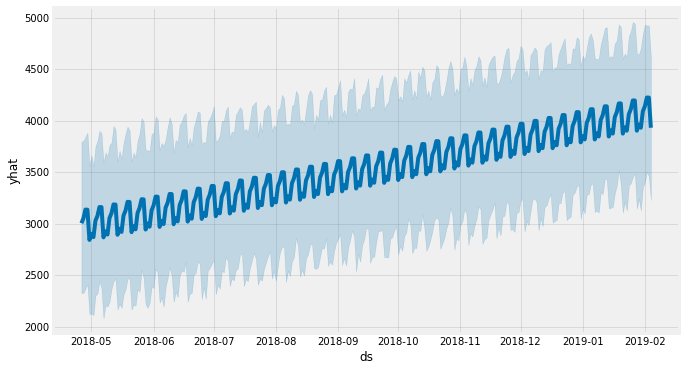

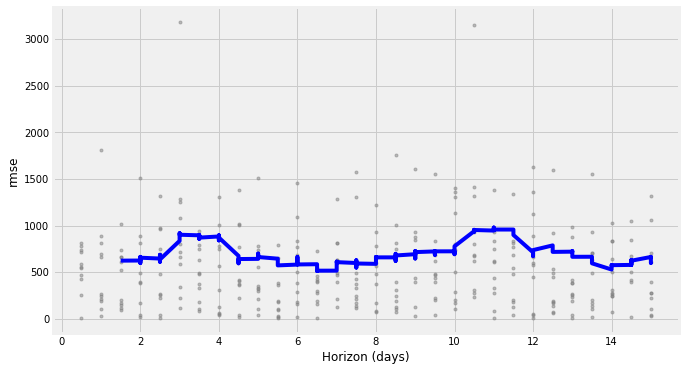

In [48]:
plot_forecast_component(m, forecast, 'yhat')

fig3 = plot_cross_validation_metric(ddf_cv, metric='rmse')

## 2. Simple Average

In [49]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [50]:
ts_data = df['Calories Burned'].resample('D').agg('sum')

In [51]:
# train_size = int(len(ts_data) * 0.8)
# train, test = ts_data[0:train_size], ts_data[train_size:len(ts_data)]
# print('Observations: %d' % (len(ts_data)))
# print('Training Observations: %d' % (len(train)))
# print('Testing Observations: %d' % (len(test)))

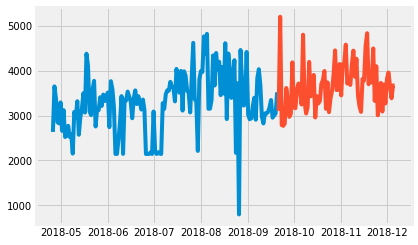

In [52]:
plt.plot(train)
plt.plot(test)
plt.show()

In [53]:
yhat = pd.DataFrame(dict(actual=test))

In [54]:
yhat['avg_forecast'] = train.mean()

In [55]:
yhat.head()

actual  avg_forecast
Date                            
2018-09-21  3105.0   3271.871622
2018-09-22  5199.0   3271.871622
2018-09-23  2787.0   3271.871622
2018-09-24  2771.0   3271.871622
2018-09-25  2820.0   3271.871622

In [56]:
def plot_data_and_predictions(predictions, label):
    plt.figure(figsize=(10, 8))

    plt.plot(train,label='Train')
    plt.plot(test, label='Test')
    plt.plot(predictions, label=label, linewidth=5)

    plt.legend(loc='best')
    plt.show()


def evaluate(actual, predictions, output=True):
    mse = metrics.mean_squared_error(actual, predictions)
    rmse = math.sqrt(mse)

    if output:
        print('MSE:  {}'.format(mse))
        print('RMSE: {}'.format(rmse))
    else:
        return mse, rmse    

def plot_and_eval(predictions, actual=test, metric_fmt='{:.2f}', linewidth=4):
    if type(predictions) is not list:
        predictions = [predictions]

    plt.figure(figsize=(16, 8))
    plt.plot(train,label='Train')
    plt.plot(test, label='Test')

    for yhat in predictions:
        mse, rmse = evaluate(actual, yhat, output=False)        
        label = f'{yhat.name}'
        if len(predictions) > 1:
            label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.plot(yhat, label=label, linewidth=linewidth)

    if len(predictions) == 1:
        label = f'{label} -- MSE: {metric_fmt} RMSE: {metric_fmt}'.format(mse, rmse)
        plt.title(label)

    plt.legend(loc='best')
    plt.show()

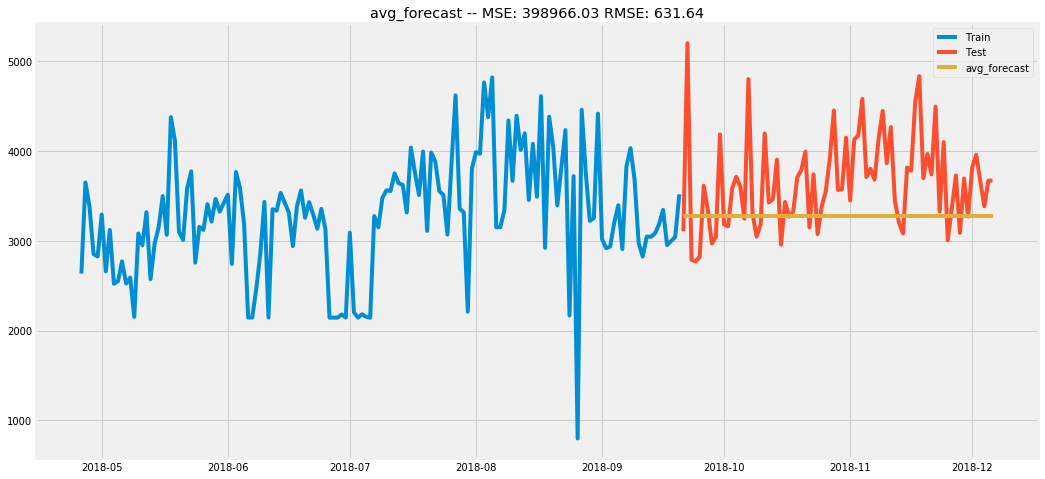

In [57]:
plot_and_eval(yhat.avg_forecast, test)

### 3. Moving Average

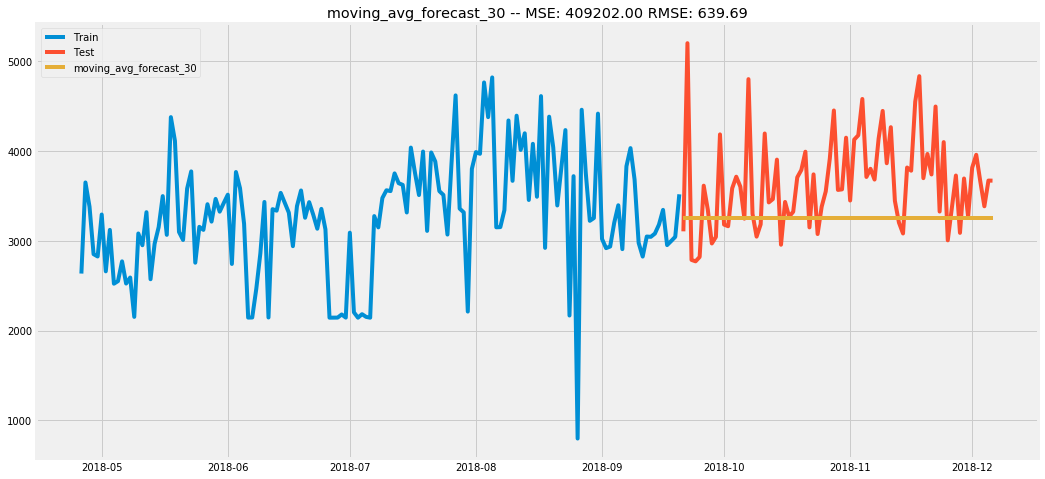

In [58]:
periods = 30
yhat['moving_avg_forecast_30'] = train.rolling(30).mean().iloc[-1]
plot_and_eval(yhat.moving_avg_forecast_30, test)

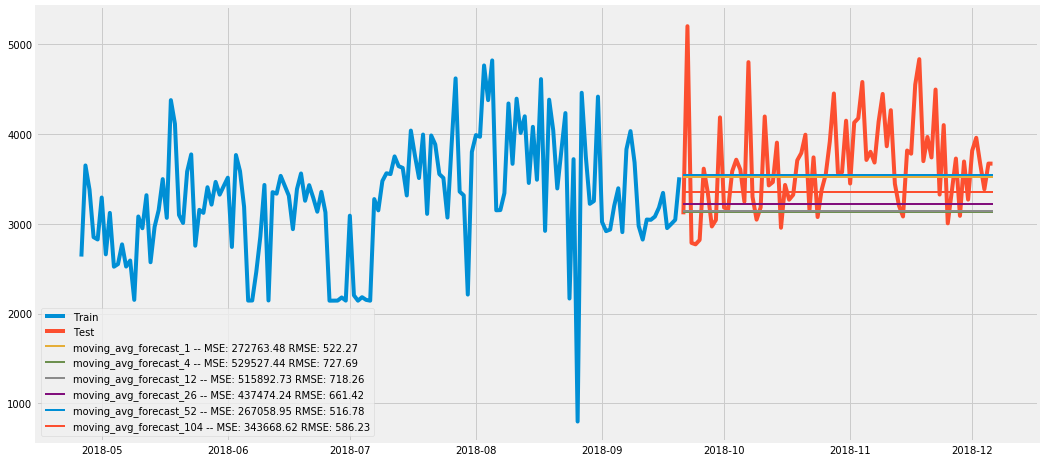

In [59]:
period_vals = [1, 4, 12, 26, 52, 104]

for periods in period_vals:
    yhat[f'moving_avg_forecast_{periods}'] = train.rolling(periods).mean().iloc[-1]

forecasts = [yhat[f'moving_avg_forecast_{p}'] for p in period_vals]

plot_and_eval(forecasts, test, linewidth=2)

## 4. Holt's Linear Trend Model

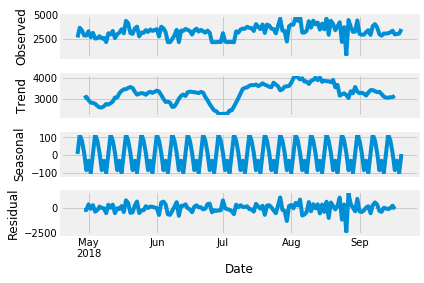

In [60]:
sm.tsa.seasonal_decompose(train).plot()
result = sm.tsa.stattools.adfuller(train)
plt.show()

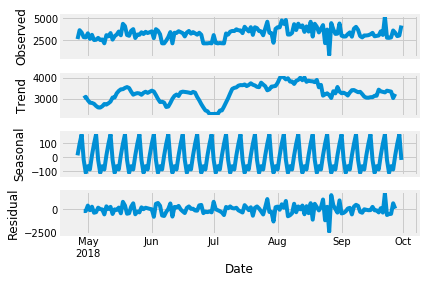

In [61]:
train = df[:'2018-09']['Calories Burned'].resample('D').agg('sum')
test = df['2018-09':]['Calories Burned'].resample('D').agg('sum')

sm.tsa.seasonal_decompose(train).plot()
result = sm.tsa.stattools.adfuller(train)
plt.show()

In [63]:
# fit1 = Holt(train).fit(smoothing_level=.25, smoothing_slope=.1)

# yhat['holt_linear'] = fit1.forecast(test.shape[0])
# plot_and_eval(yhat.holt_linear)

## 5. Arima

In [64]:
df = df.reset_index()
df.Date = pd.to_datetime(df.Date)
df.head()

Date  Calories Burned   Steps  Distance  Floors  Minutes Sedentary  \
0 2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
1 2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2 2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
3 2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
4 2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                    93.0                    0.0                  0.0   
1                   219.0                   46.0                 17.0   
2                   155.0                   22.0                 11.0   
3                   122.0                    0.0                  0.0   
4                   104.0                    0.0                  0.0   

   Activity Calories  
0              566.0  
1             1752.0  
2             1124.0  
3              602.0  
4              540.0

In [65]:
# df = fitbit.input_missing_row(df)

In [66]:
df.tail(140)

Date  Calories Burned    Steps  Distance  Floors  Minutes Sedentary  \
85  2018-07-20           3110.0   6680.0      3.15     3.0        1262.000000   
86  2018-07-21           3983.0  12279.0      5.79    10.0         569.000000   
87  2018-07-22           3883.0  13418.0      6.33    19.0         839.000000   
88  2018-07-23           3553.0   9203.0      4.34     5.0         748.000000   
89  2018-07-24           3510.0   9215.0      4.35     6.0        1203.000000   
90  2018-07-25           3069.0   5666.0      2.67     8.0        1253.000000   
91  2018-07-26           3864.0  12467.0      5.88    10.0         704.000000   
92  2018-07-27           4618.0  16306.0      7.73    18.0         634.000000   
93  2018-07-28           3358.0   8073.0      3.81     5.0         674.000000   
94  2018-07-29           3316.0   6450.0      3.04    18.0        1211.000000   
95  2018-07-30           2212.0    357.0      0.17     1.0         947.000000   
96  2018-07-31           3800.0   8295.0      3.91     4.0         688.000000   
97  2018-08-01           3987.0  12157.0      5.73     7.0         786.000000   
98  2018-08-02           3968.0   9629.0      4.54     4.0         924.000000   
99  2018-08-03           4762.0  18215.0      8.59    12.0         607.000000   
100 2018-08-04           4376.0  17126.0      8.08    78.0         585.000000   
101 2018-08-05           4818.0  18565.0      8.76    29.0         561.000000   
102 2018-08-06           3150.0   6185.0      2.92     7.0         775.000000   
103 2018-08-07           3152.0   6558.0      3.09     6.0         777.000000   
104 2018-08-08           3341.0   7772.0      3.67    12.0         724.000000   
105 2018-08-09           4339.0  15635.0      7.37    13.0        1061.000000   
106 2018-08-10           3667.0   7470.0      3.52     2.0         641.000000   
107 2018-08-11           4392.0  17519.0      8.26    21.0         448.000000   
108 2018-08-12           4011.0  11193.0      5.28     6.0         585.000000   
109 2018-08-13           4196.0  17014.0      8.02    17.0         771.000000   
110 2018-08-14           3454.0   8448.0      3.98    11.0         719.000000   
111 2018-08-15           4079.0  12259.0      5.78     8.0         704.000000   
112 2018-08-16           3490.0   8039.0      3.79    18.0         877.000000   
113 2018-08-17           4610.0  16482.0      7.77    11.0         608.000000   
114 2018-08-18           2921.0   4657.0      2.20     8.0         551.000000   
..         ...              ...      ...       ...     ...                ...   
195 2018-11-07           3681.0  13664.0      6.46     9.0         875.169935   
196 2018-11-08           4137.0  15542.0      7.33    26.0         875.169935   
197 2018-11-09           4445.0  16732.0      7.99    14.0         875.169935   
198 2018-11-10           3863.0  13636.0      7.04    16.0         875.169935   
199 2018-11-11           4264.0  17761.0      8.36   129.0         875.169935   
200 2018-11-12           3444.0  10184.0      4.82    19.0         875.169935   
201 2018-11-13           3202.0  10330.0      4.87    16.0         875.169935   
202 2018-11-14           3081.0   7598.0      3.58    15.0         875.169935   
203 2018-11-15           3815.0  12360.0      5.90    10.0         875.169935   
204 2018-11-16           3780.0  12286.0      5.73    13.0         875.169935   
205 2018-11-17           4548.0  20395.0     10.06    31.0         875.169935   
206 2018-11-18           4832.0  25512.0     12.00    23.0         875.169935   
207 2018-11-19           3697.0  11993.0      5.56    17.0         875.169935   
208 2018-11-20           3966.0  15527.0      7.27    13.0         875.169935   
209 2018-11-21           3738.0  11079.0      5.16     4.0         875.169935   
210 2018-11-22           4494.0  16705.0      7.84   177.0         875.169935   
211 2018-11-23           3325.0   9602.0      4.53    16.0         875.169935   
212 2018-11-24           4098.0  17004.0 

In [67]:
df = df.rename(columns={'Calories Burned': 'calories_burned'})

In [68]:
# df = df.reset_index()

In [69]:
df.head()

Date  calories_burned   Steps  Distance  Floors  Minutes Sedentary  \
0 2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
1 2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2 2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
3 2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
4 2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

   Minutes Lightly Active  Minutes Fairly Active  Minutes Very Active  \
0                    93.0                    0.0                  0.0   
1                   219.0                   46.0                 17.0   
2                   155.0                   22.0                 11.0   
3                   122.0                    0.0                  0.0   
4                   104.0                    0.0                  0.0   

   Activity Calories  
0              566.0  
1             1752.0  
2             1124.0  
3              602.0  
4              540.0

In [70]:
df.Date = pd.to_datetime(df.Date)
df = df.set_index('Date')
df.head()

calories_burned   Steps  Distance  Floors  Minutes Sedentary  \
Date                                                                       
2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

            Minutes Lightly Active  Minutes Fairly Active  \
Date                                                        
2018-04-26                    93.0                    0.0   
2018-04-27                   219.0                   46.0   
2018-04-28                   155.0                   22.0   
2018-04-29                   122.0                    0.0   
2018-04-30                   104.0                    0.0   

            Minutes Very Active  Activity Calories  
Date                                                
2018-04-26                  0.0              566.0  
2018-04-27                 17.0             1752.0  
2018-04-28                 11.0             1124.0  
2018-04-29                  0.0              602.0  
2018-04-30                  0.0              540.0

In [71]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

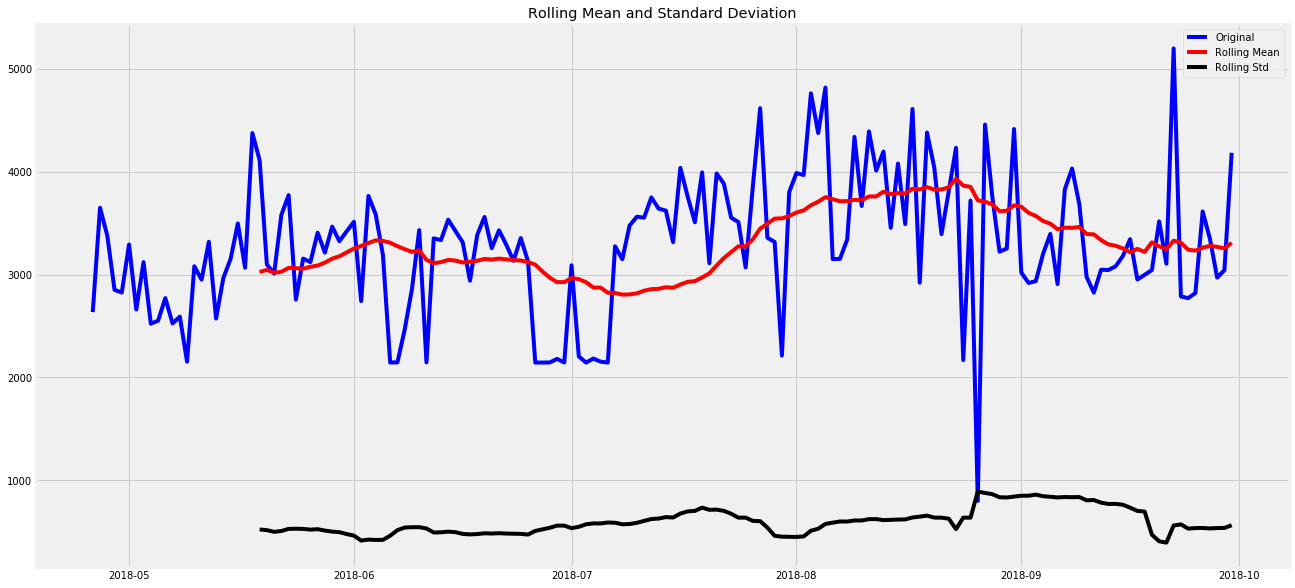

Results of Dickey Fuller test: 
Test Statistics                 -5.239096
p-value                          0.000007
# Lag Used                       1.000000
Number of Observations Used    156.000000
Critical Value (1%)             -3.472979
Critical Value (5%)             -2.880252
Critical Value (10%)            -2.576747
dtype: float64


In [72]:
rcParams['figure.figsize']=(20,10)
test_stationary(train)

### Remove Trend

In [73]:
train_log = np.log(train)
test_log = np.log(test)

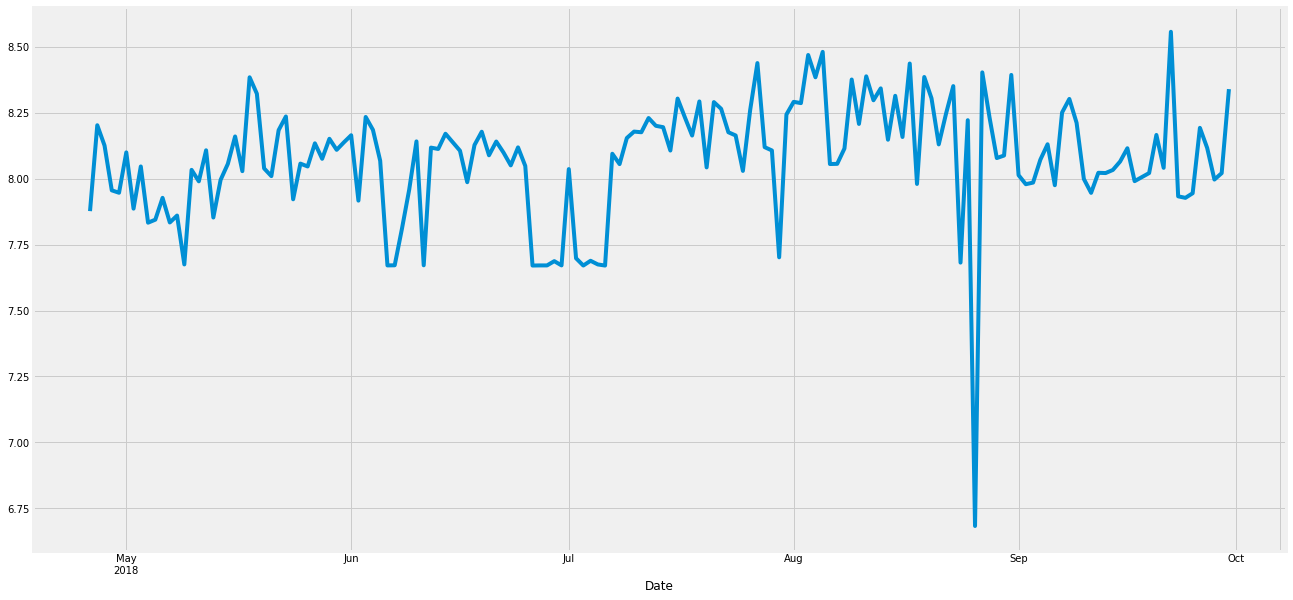

In [74]:
train_log.plot()

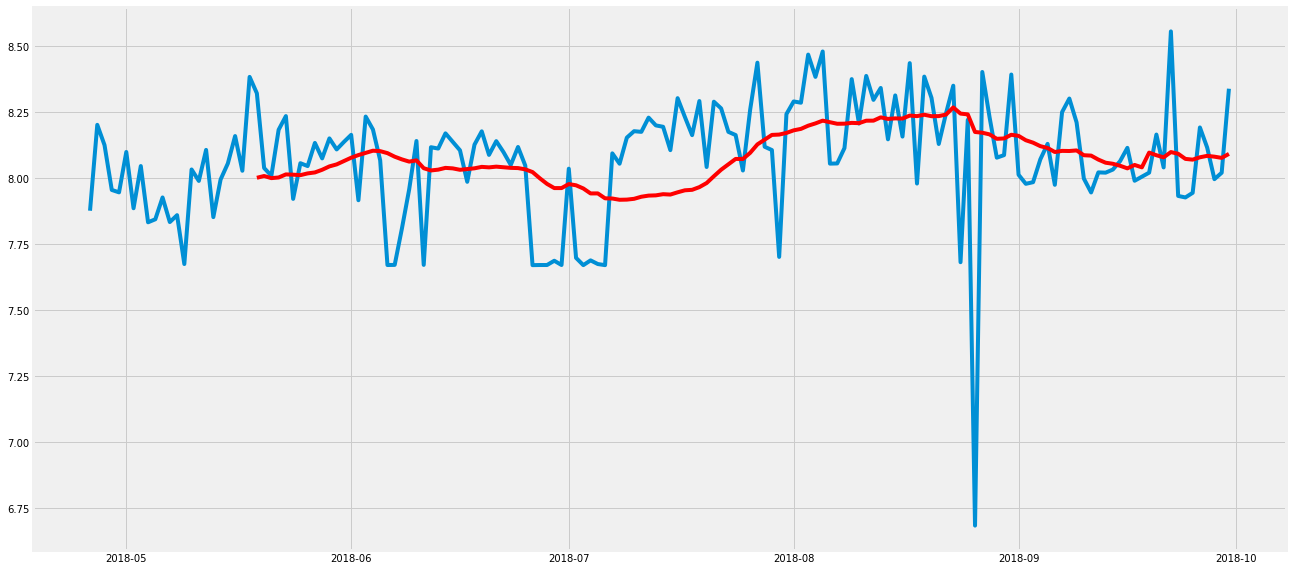

In [75]:
moving_avg = train_log.rolling(24).mean()
plt.plot(train_log)
plt.plot(moving_avg, color = 'red')

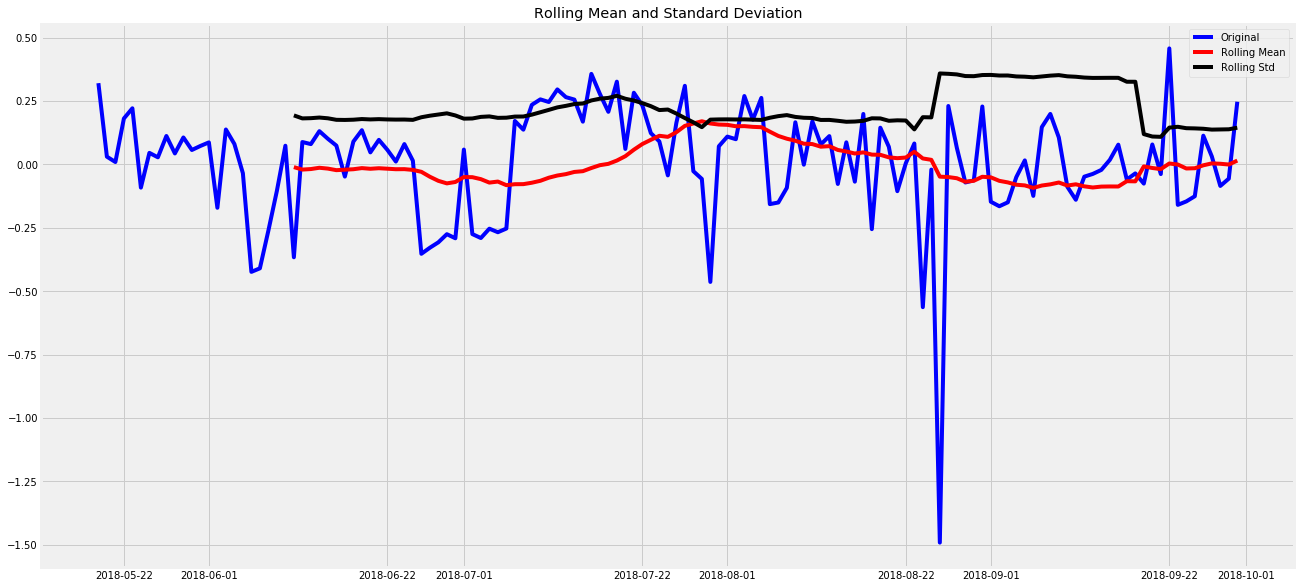

Results of Dickey Fuller test: 
Test Statistics                 -5.326536
p-value                          0.000005
# Lag Used                       1.000000
Number of Observations Used    133.000000
Critical Value (1%)             -3.480500
Critical Value (5%)             -2.883528
Critical Value (10%)            -2.578496
dtype: float64


In [76]:
train_log_moving_diff = train_log - moving_avg
train_log_moving_diff.dropna(inplace = True)
test_stationary(train_log_moving_diff)

### Differencing can help to make series stable and eliminate trend

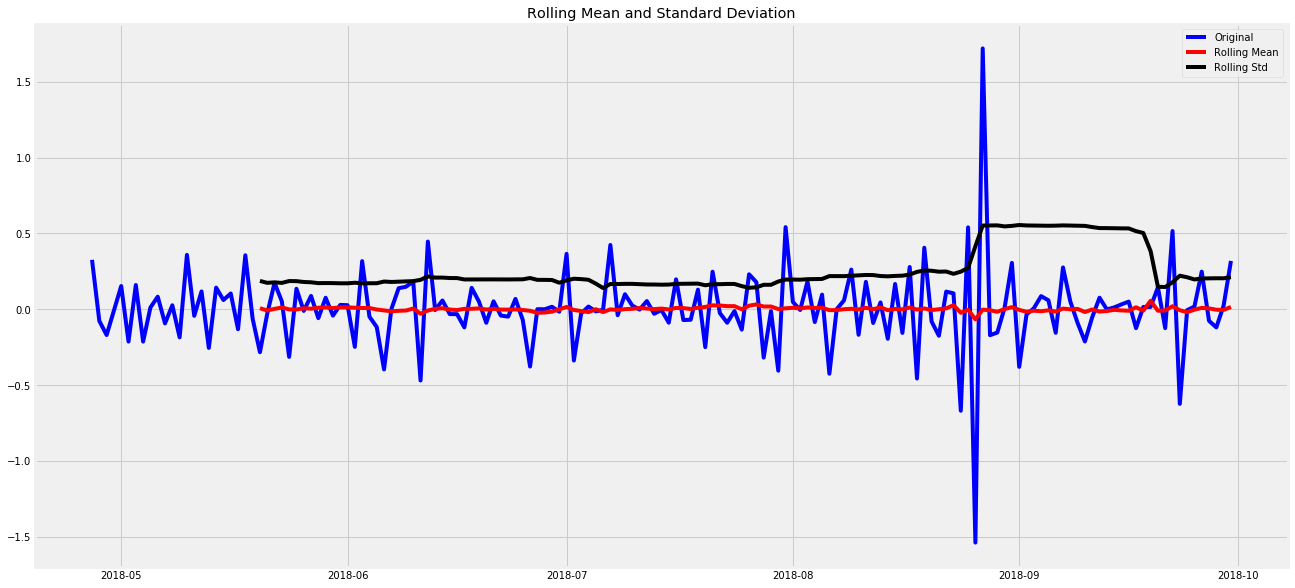

Results of Dickey Fuller test: 
Test Statistics               -7.634080e+00
p-value                        1.973545e-11
# Lag Used                     6.000000e+00
Number of Observations Used    1.500000e+02
Critical Value (1%)           -3.474715e+00
Critical Value (5%)           -2.881009e+00
Critical Value (10%)          -2.577151e+00
dtype: float64


In [77]:
train_log_diff = train_log - train_log.shift(1)
test_stationary(train_log_diff.dropna())

### Removing Seasonailty

In [78]:
df = df.rename(columns={'Calories Burned': 'calories_burned'})

In [79]:
df.head()

calories_burned   Steps  Distance  Floors  Minutes Sedentary  \
Date                                                                       
2018-04-26           2635.0  2931.0      1.38     2.0             1347.0   
2018-04-27           3649.0  9971.0      4.70    19.0             1158.0   
2018-04-28           3379.0  3521.0      1.66     2.0              702.0   
2018-04-29           2851.0  1639.0      0.77     0.0              891.0   
2018-04-30           2825.0  1323.0      0.62     0.0              880.0   

            Minutes Lightly Active  Minutes Fairly Active  \
Date                                                        
2018-04-26                    93.0                    0.0   
2018-04-27                   219.0                   46.0   
2018-04-28                   155.0                   22.0   
2018-04-29                   122.0                    0.0   
2018-04-30                   104.0                    0.0   

            Minutes Very Active  Activity Calories  
Date                                                
2018-04-26                  0.0              566.0  
2018-04-27                 17.0             1752.0  
2018-04-28                 11.0             1124.0  
2018-04-29                  0.0              602.0  
2018-04-30                  0.0              540.0

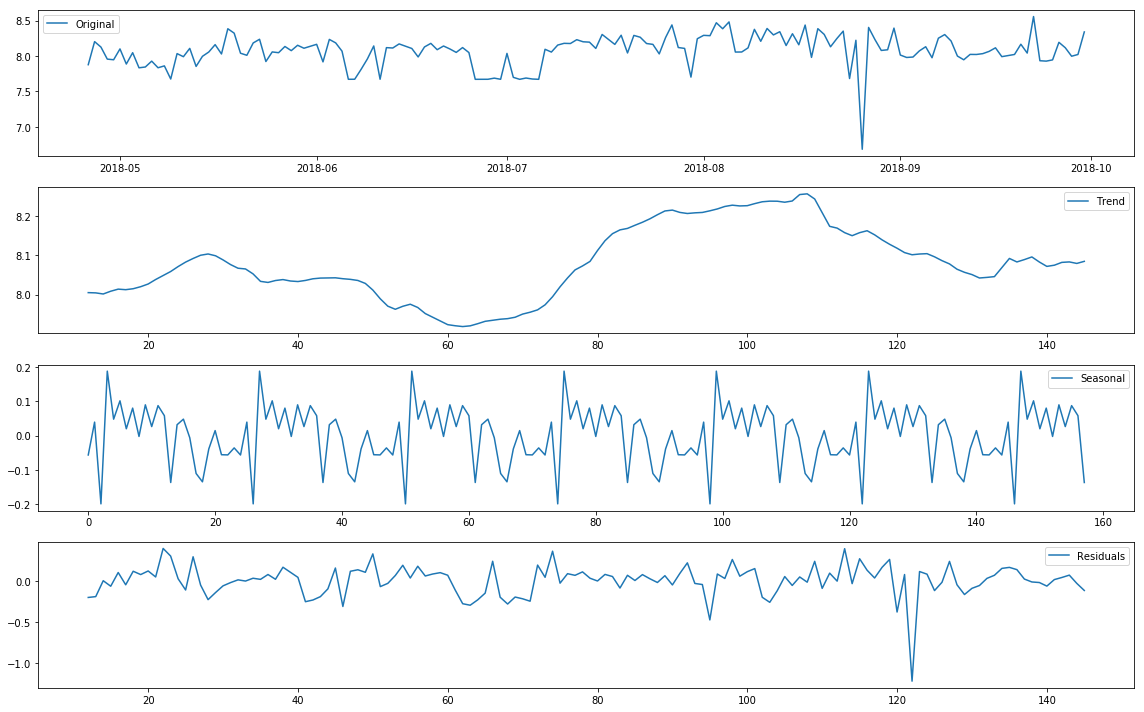

In [80]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(train_log).values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

### Let's check stationarity of residuals

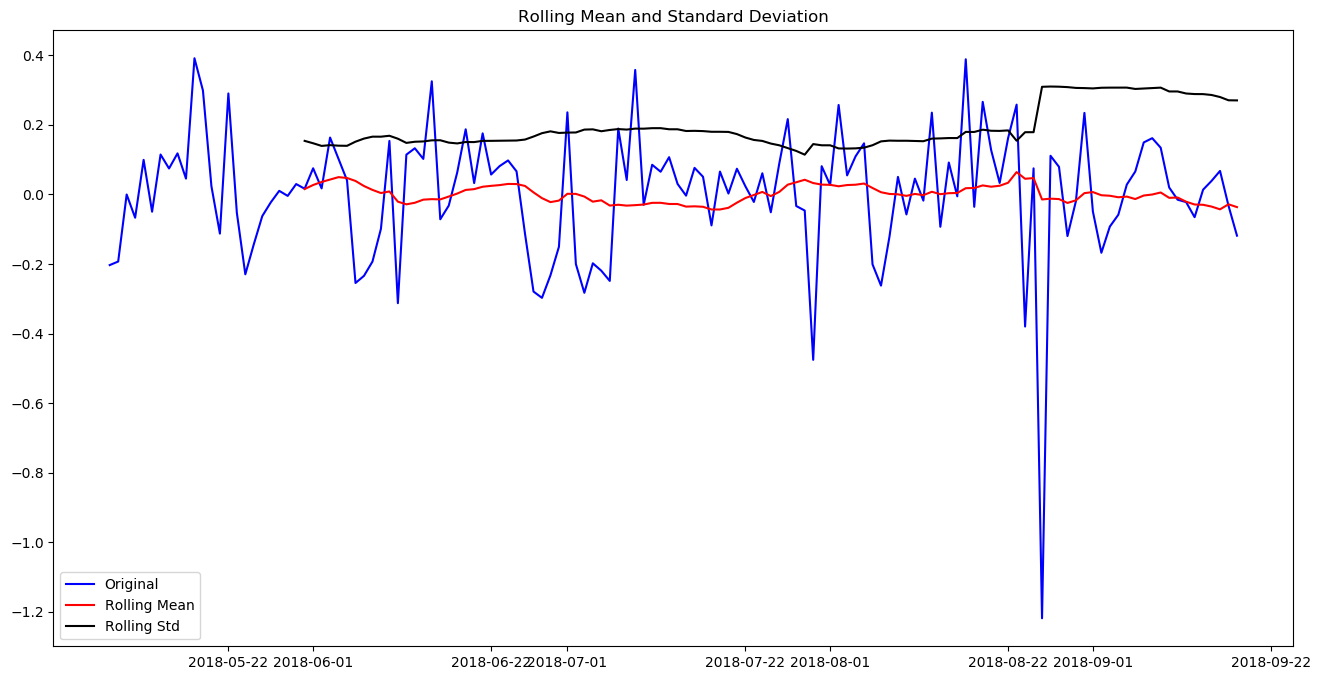

Results of Dickey Fuller test: 
Test Statistics               -6.437157e+00
p-value                        1.642005e-08
# Lag Used                     1.000000e+00
Number of Observations Used    1.320000e+02
Critical Value (1%)           -3.480888e+00
Critical Value (5%)           -2.883697e+00
Critical Value (10%)          -2.578586e+00
dtype: float64


In [81]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['date'] = train_log.index
train_log_decompose.set_index('date', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationary(train_log_decompose[0])

In [82]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

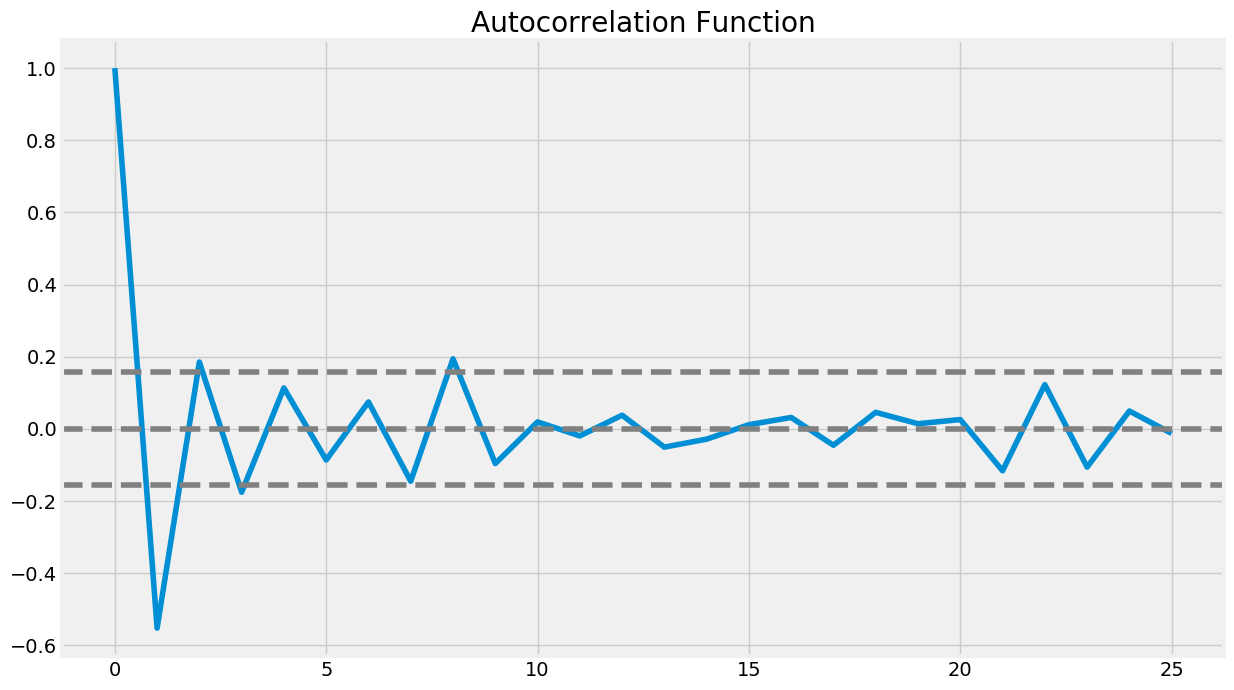

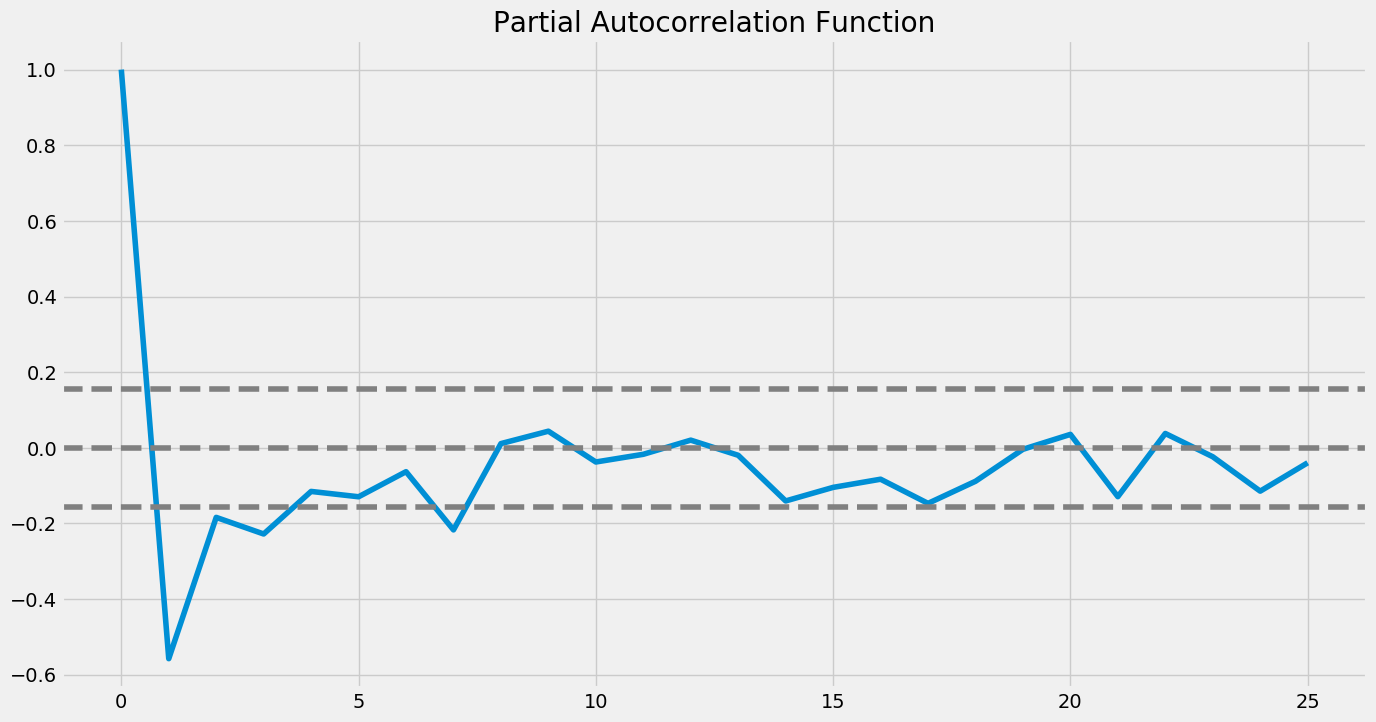

In [83]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()
# PACF
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()

### AR Model

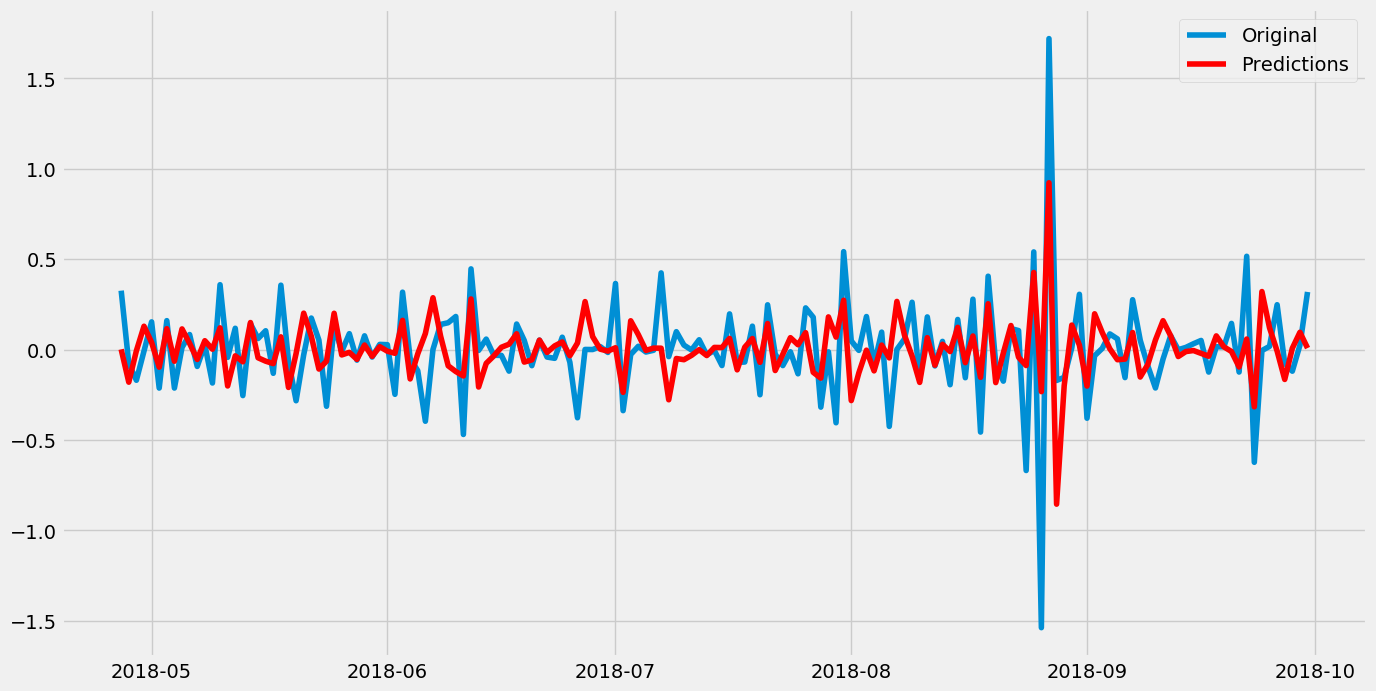

In [84]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(train_log, order = (2,1,0))  #here q value is zero since it is just AR Model
results_AR = model.fit(disp=-1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_AR.fittedvalues, color = 'red', label = 'Predictions')
plt.legend(loc = 'best')

In [85]:
AR_predict = results_AR.predict(start='2018-09-21', end='2018-12-06')
AR_predict = AR_predict.cumsum().shift().fillna(0)
AR_predict1 = pd.Series(np.ones(test.shape[0])* np.log(test)[0], index = test.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict = np.exp(AR_predict1)

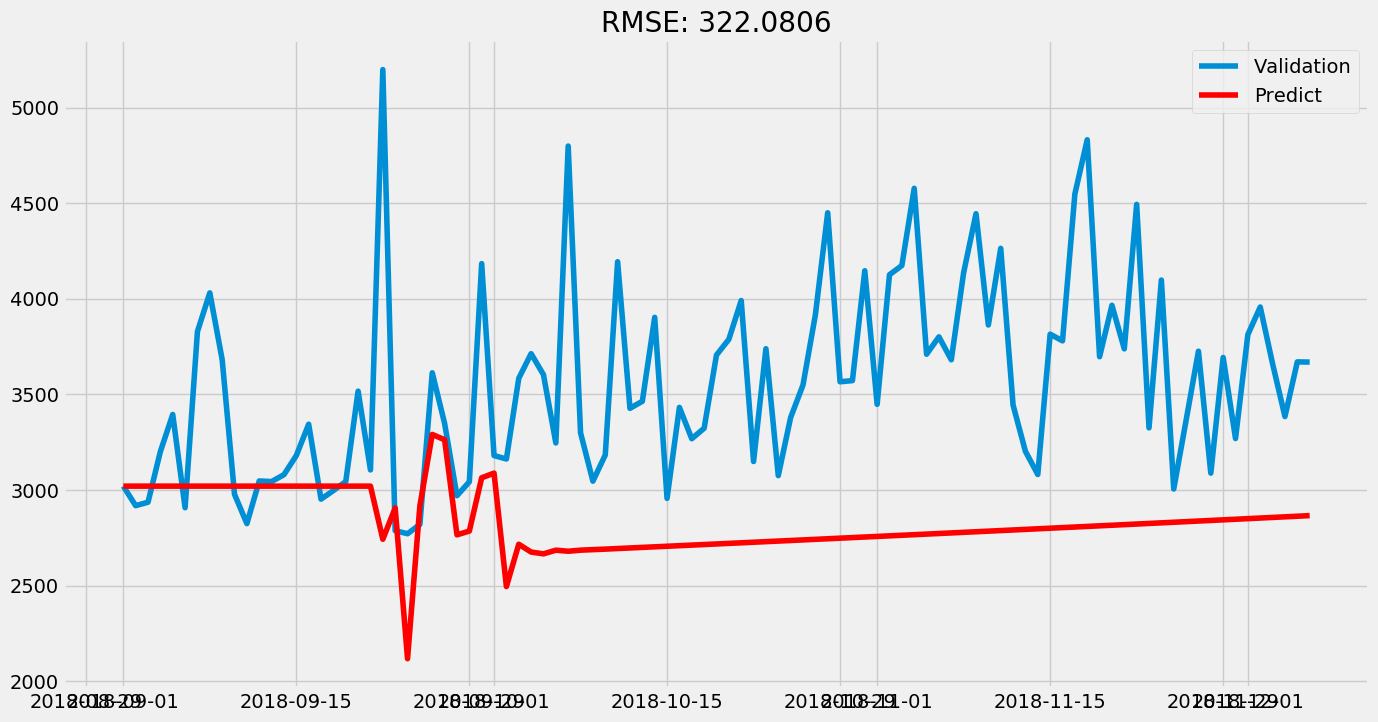

In [86]:
plt.figure(figsize = (15,8))
plt.plot(test, label = "Validation")
plt.plot(AR_predict, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, test))/test.shape[0]))
plt.show()

### Moving Average Model

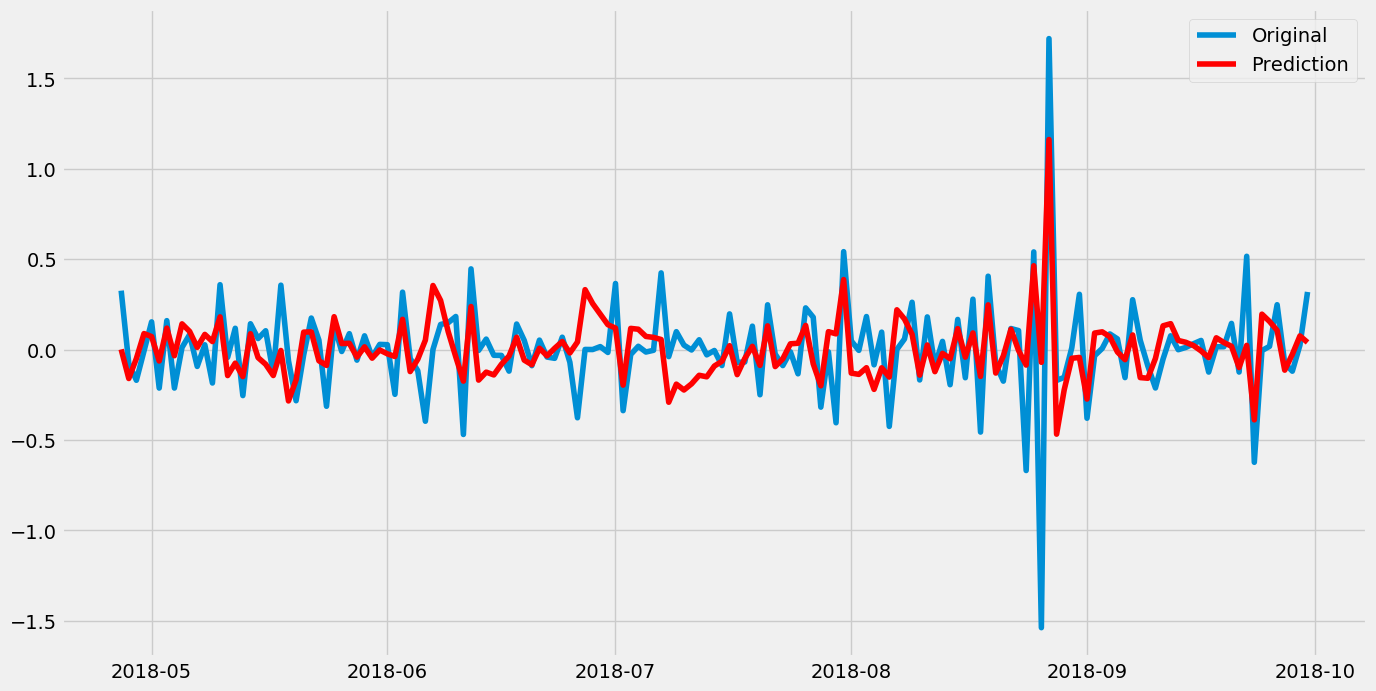

In [87]:
plt.figure(figsize = (15,8))
model = ARIMA(train_log, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

In [88]:
MA_predict = results_MA.predict(start='2018-09-21', end='2018-12-06')
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(test.shape[0]) * np.log(test), index = test.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

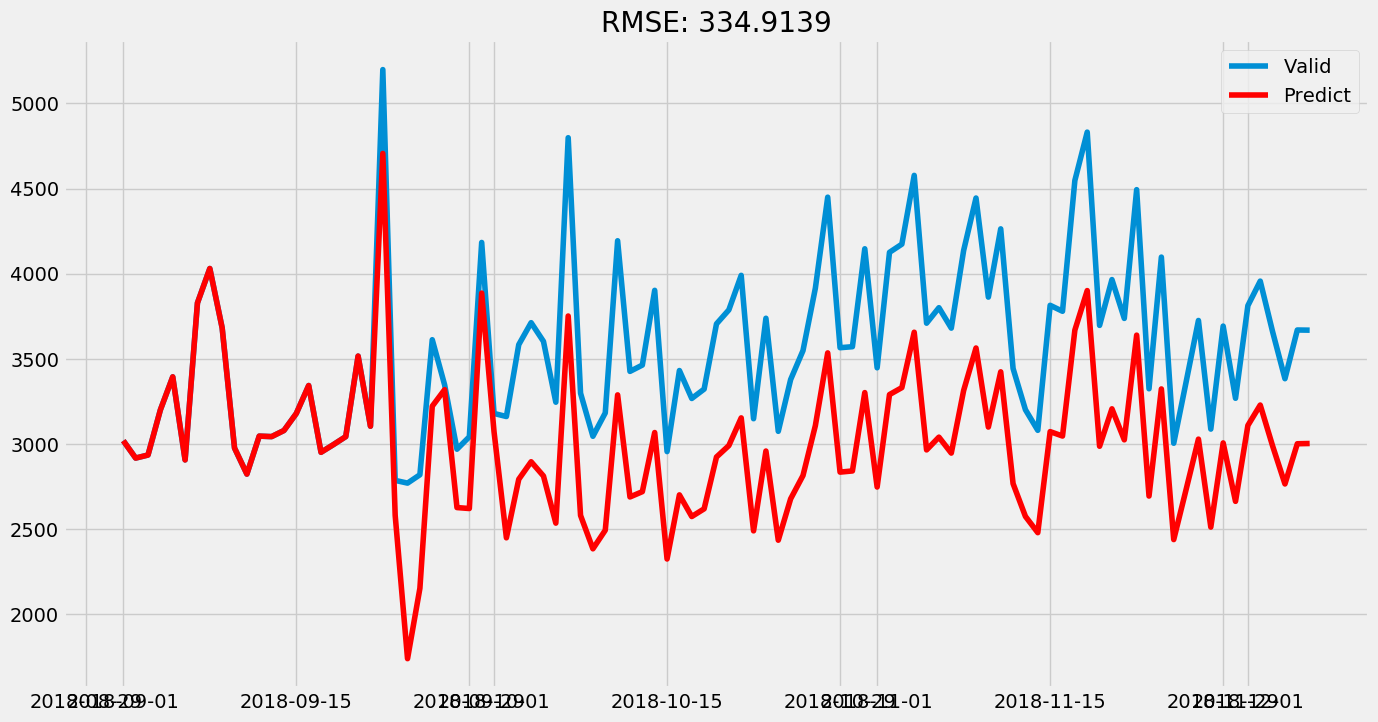

In [89]:
plt.figure(figsize = (15,8))
plt.plot(test, label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, test))/test.shape[0]))
plt.show()

### Combined Model

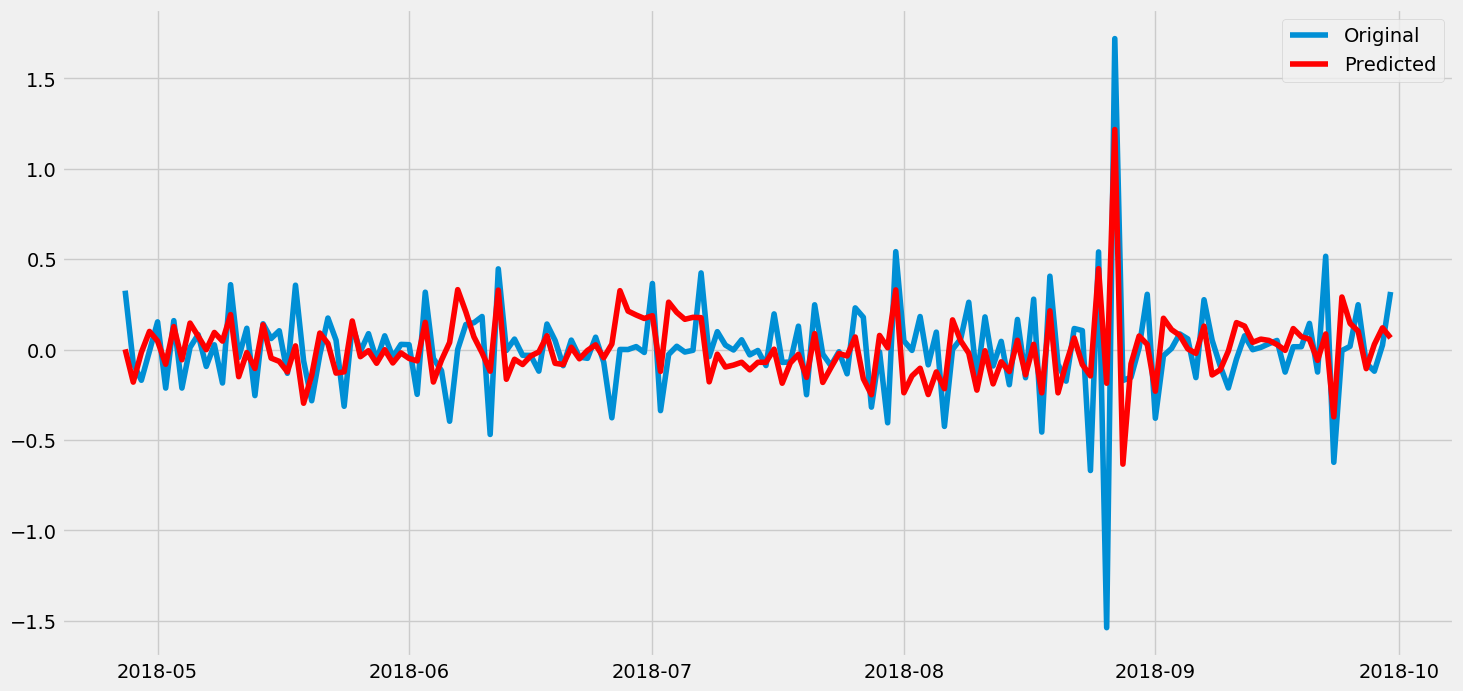

In [90]:
plt.figure(figsize = (16,8))
model = ARIMA(train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [91]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set), index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set, label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [92]:
ARIMA_predict_diff=results_ARIMA.predict(start='2018-09-21', end='2018-12-06')

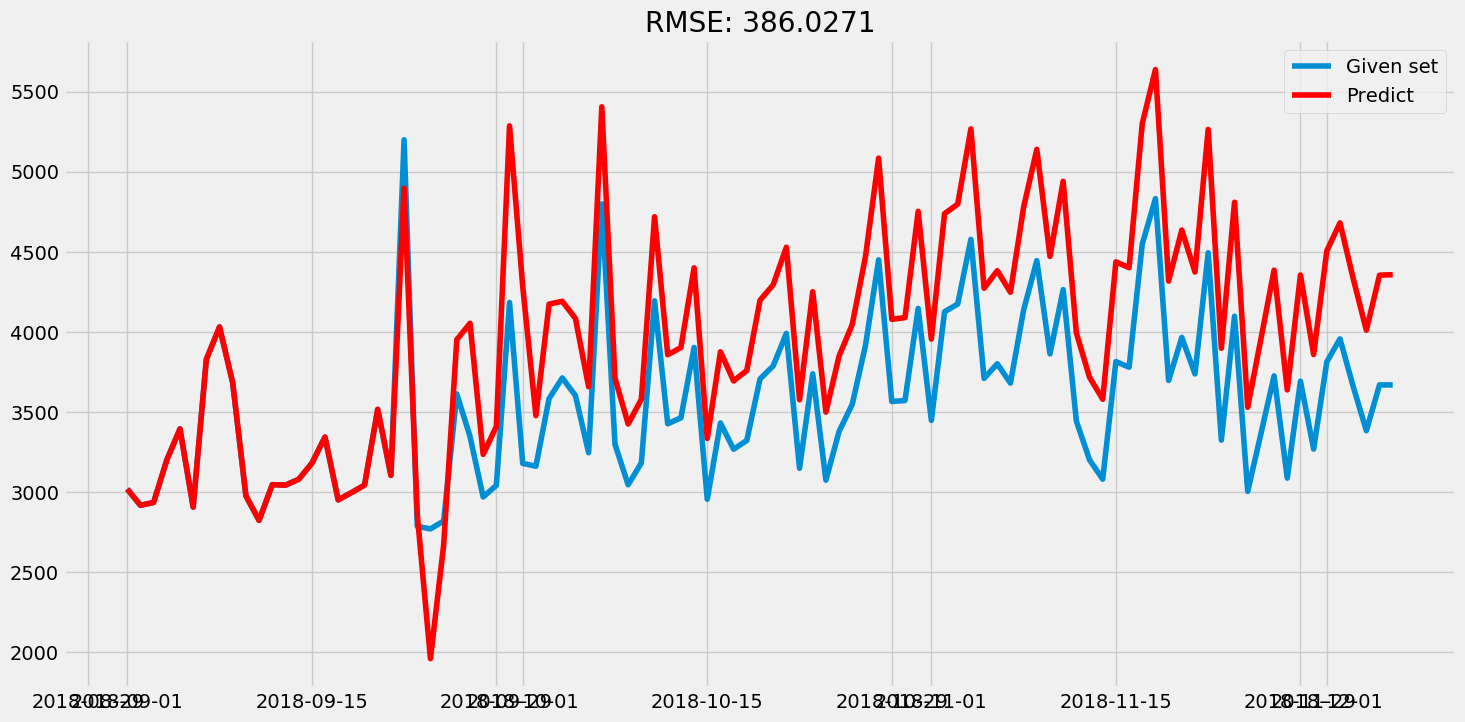

In [93]:
plt.figure(figsize = (16,8))
check_prediction_diff(ARIMA_predict_diff, test)

## 6. SARIMAX Model

In [94]:
df.tail(140)

calories_burned    Steps  Distance  Floors  Minutes Sedentary  \
Date                                                                        
2018-07-20           3110.0   6680.0      3.15     3.0        1262.000000   
2018-07-21           3983.0  12279.0      5.79    10.0         569.000000   
2018-07-22           3883.0  13418.0      6.33    19.0         839.000000   
2018-07-23           3553.0   9203.0      4.34     5.0         748.000000   
2018-07-24           3510.0   9215.0      4.35     6.0        1203.000000   
2018-07-25           3069.0   5666.0      2.67     8.0        1253.000000   
2018-07-26           3864.0  12467.0      5.88    10.0         704.000000   
2018-07-27           4618.0  16306.0      7.73    18.0         634.000000   
2018-07-28           3358.0   8073.0      3.81     5.0         674.000000   
2018-07-29           3316.0   6450.0      3.04    18.0        1211.000000   
2018-07-30           2212.0    357.0      0.17     1.0         947.000000   
2018-07-31           3800.0   8295.0      3.91     4.0         688.000000   
2018-08-01           3987.0  12157.0      5.73     7.0         786.000000   
2018-08-02           3968.0   9629.0      4.54     4.0         924.000000   
2018-08-03           4762.0  18215.0      8.59    12.0         607.000000   
2018-08-04           4376.0  17126.0      8.08    78.0         585.000000   
2018-08-05           4818.0  18565.0      8.76    29.0         561.000000   
2018-08-06           3150.0   6185.0      2.92     7.0         775.000000   
2018-08-07           3152.0   6558.0      3.09     6.0         777.000000   
2018-08-08           3341.0   7772.0      3.67    12.0         724.000000   
2018-08-09           4339.0  15635.0      7.37    13.0        1061.000000   
2018-08-10           3667.0   7470.0      3.52     2.0         641.000000   
2018-08-11           4392.0  17519.0      8.26    21.0         448.000000   
2018-08-12           4011.0  11193.0      5.28     6.0         585.000000   
2018-08-13           4196.0  17014.0      8.02    17.0         771.000000   
2018-08-14           3454.0   8448.0      3.98    11.0         719.000000   
2018-08-15           4079.0  12259.0      5.78     8.0         704.000000   
2018-08-16           3490.0   8039.0      3.79    18.0         877.000000   
2018-08-17           4610.0  16482.0      7.77    11.0         608.000000   
2018-08-18           2921.0   4657.0      2.20     8.0         551.000000   
...                     ...      ...       ...     ...                ...   
2018-11-07           3681.0  13664.0      6.46     9.0         875.169935   
2018-11-08           4137.0  15542.0      7.33    26.0         875.169935   
2018-11-09           4445.0  16732.0      7.99    14.0         875.169935   
2018-11-10           3863.0  13636.0      7.04    16.0         875.169935   
2018-11-11           4264.0  17761.0      8.36   129.0         875.169935   
2018-11-12           3444.0  10184.0      4.82    19.0         875.169935   
2018-11-13           3202.0  10330.0      4.87    16.0         875.169935   
2018-11-14           3081.0   7598.0      3.58    15.0         875.169935   
2018-11-15           3815.0  12360.0      5.90    10.0         875.169935   
2018-11-16           3780.0  12286.0      5.73    13.0         875.169935   
2018-11-17           4548.0  20395.0     10.06    31.0         875.169935   
2018-11-18           4832.0  25512.0     12.00    23.0         875.169935   
2018-11-19           3697.0  11993.0      5.56    17.0         875.169935   
2018-11-20           3966.0  15527.0      7.27    13.0         875.169935   
2018-11-21           3738.0  11079.0      5.16     4.0         875.169935   
2018-11-22           4494.0  16705.0      7.84   177.0         875.169935   
2018-11-23           3325.0   9602.0      4.53    16.0         875.169935   
2018-11-24           4098.0  17004.0      9.20    23.0         875.169935   
2018-11-25           3005.0   6921.0      3.26    11.0         875.169935   
2018-11-

In [95]:
import statsmodels.api as sm

In [96]:
test.shape

(97,)

In [97]:
train.shape

(158,)

Text(0.5, 1.0, 'SARIMAX Model')

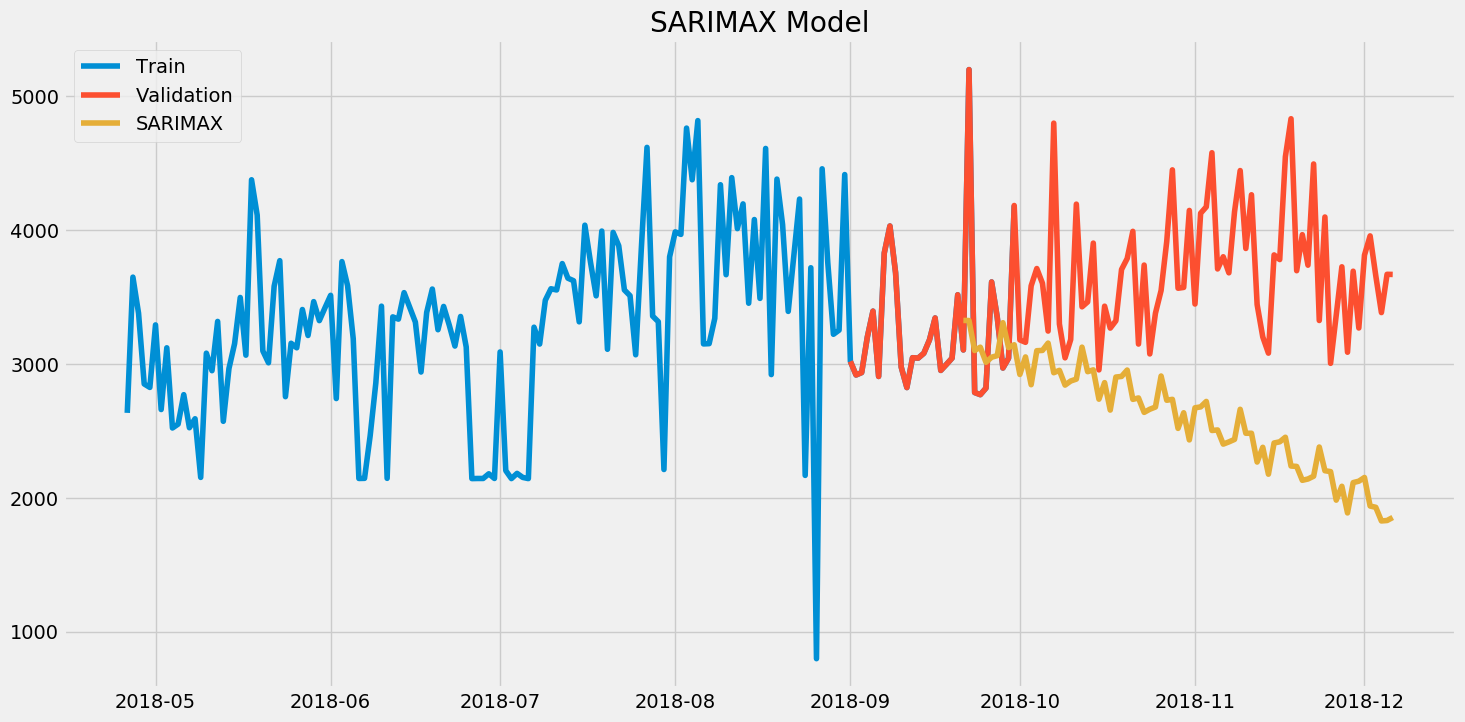

In [98]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train, order = (2,1,4), seasonal_order =(0,1,1,7)).fit()
y_hat_avg['SARIMAX'] = fit1.predict(start='2018-09-21', end='2018-12-06', dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(train, label = "Train")
plt.plot(test, label = "Validation")
plt.plot(y_hat_avg['SARIMAX'], label ="SARIMAX")
plt.legend(loc = "best")
plt.title("SARIMAX Model")